# Genotypes Data Analysis _ L0 Regularization

This notebook reads and analyzes the genotypes.txt file, which contains genetic data with IDs in the first column and allele pairs in the subsequent columns. The file format is space-separated with specific patterns:
- First column contains IDs
- Alleles in each bi-allele pair are separated by one space
- Different allele pairs are separated by two spaces

This section introduces the analysis of genotype data, which forms the basis for the following statistical and machine learning procedures.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set display options
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

## Reading the Genotypes File

The file has a specific format where:
- The data is space-separated (not tab-separated)
- The two columns for each bi-allele are separated by one space
- Each pair of alleles is separated by two spaces

The genotype dataset is loaded here, typically containing SNP data for various individuals.

In [ ]:

genotypes_df = pd.read_csv('genotypes.txt', sep='  ', nrows=5,header=None)
genotypes_df = genotypes_df.drop(index=0)
print(genotypes_df.head())
print(genotypes_df[1])


   0     1     2     3     4     5     6     7     8     9      ... 10022 10023 10024 10025 10026 10027 10028 10029 10030 10031
1      2   1 2   1 2   1 1   1 2   1 2   1 2   1 2   1 2   2 2  ...   1 1   1 2   1 1   1 2   2 2   2 2   1 1   1 2   1 1   1 2
2      3   1 2   2 2   1 1   1 2   1 2   1 2   2 2   1 1   1 1  ...   1 1   1 2   1 1   2 2   1 1   1 2   1 1   1 2   1 2   2 2
3      4   2 2   2 2   1 1   1 1   1 2   1 1   2 2   1 1   1 2  ...   1 1   1 2   1 1   1 2   2 2   2 2   1 1   1 2   1 2   2 2
4      5   2 2   1 2   1 2   1 2   2 2   2 2   1 2   2 2   2 2  ...   1 1   2 2   1 1   1 1   2 2   2 2   1 1   1 1   1 1   2 2

[4 rows x 10032 columns]
1    1 2
2    1 2
3    2 2
4    2 2
Name: 1, dtype: object


/var/folders/_s/b581pbnn6nn_7xwxmt8jgbbh0000gn/T/ipykernel_73573/2802912486.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  genotypes_df = pd.read_csv('genotypes.txt', sep='  ', nrows=5,header=None)


In [ ]:

genotypes_df = pd.read_csv('genotypes.txt', sep='  ', header=None,  engine='python')

genotypes_df = genotypes_df.drop(genotypes_df.columns[0], axis=1)

# Replace values as specified
genotypes_df = genotypes_df.replace({'1 1': 0, '1 2': 1, '2 2': 2})

print(genotypes_df.head())
print(genotypes_df.dtypes.unique())
print(genotypes_df[1])
print(genotypes_df.shape)

/var/folders/_s/b581pbnn6nn_7xwxmt8jgbbh0000gn/T/ipykernel_73573/786223497.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genotypes_df = genotypes_df.replace({'1 1': 0, '1 2': 1, '2 2': 2})


   1      2      3      4      5      6      7      8      9      10     ...  10022  10023  10024  10025  10026  10027  10028  10029  10030  10031
0      2      2      1      1      2      1      2      1      1      0  ...      1      0      0      2      2      2      0      1      1      2
1      1      1      0      1      1      1      1      1      2      0  ...      0      1      0      1      2      2      0      1      0      1
2      1      2      0      1      1      1      2      0      0      0  ...      0      1      0      2      0      1      0      1      1      2
3      2      2      0      0      1      0      2      0      1      0  ...      0      1      0      1      2      2      0      1      1      2
4      2      1      1      1      2      2      1      2      2      0  ...      0      2      0      0      2      2      0      0      0      2

[5 rows x 10031 columns]
[dtype('int64')]
0       2
1       1
2       1
3       2
4       2
       ..
3221    1
3222 

In [68]:
marker_info_df = pd.read_csv('marker-info.txt', sep=' ', header=None, index_col=0)
marker_info_df = marker_info_df.drop(1, axis=1)
marker_info_df = marker_info_df.rename(columns={2: 'chromosome', 3: 'position'})
marker_info_df.head()

,chromosome,position
0,,
1,1,88671
2,1,114576
3,1,115699
4,1,155552
5,1,175528


In [69]:
marker_info_df['col_label'] = "chr_"+marker_info_df['chromosome'].astype(str)+"_pos_"+marker_info_df['position'].astype(str)
marker_info_df.drop(columns=['chromosome', 'position'], inplace=True)
marker_info_df

,col_label
0,
1,chr_1_pos_88671
2,chr_1_pos_114576
3,chr_1_pos_115699
4,chr_1_pos_155552
5,chr_1_pos_175528
...,...
10027,chr_5_pos_99426456
10028,chr_5_pos_99471982
10029,chr_5_pos_99610295


In [ ]:
marker_info_df.drop(columns=['chromosome', 'position'], inplace=True)
marker_info_df

,col_label
0,
1,chr_1_pos_88671
2,chr_1_pos_114576
3,chr_1_pos_115699
4,chr_1_pos_155552
5,chr_1_pos_175528
...,...
10027,chr_5_pos_99426456
10028,chr_5_pos_99471982
10029,chr_5_pos_99610295


In [70]:
genotypes_df.columns = marker_info_df['col_label']

In [72]:
genotypes_df

col_label,chr_1_pos_88671,chr_1_pos_114576,chr_1_pos_115699,chr_1_pos_155552,chr_1_pos_175528,chr_1_pos_181280,chr_1_pos_201670,chr_1_pos_261558,chr_1_pos_277357,chr_1_pos_298436,...,chr_5_pos_99117225,chr_5_pos_99141416,chr_5_pos_99172858,chr_5_pos_99213046,chr_5_pos_99233297,chr_5_pos_99426456,chr_5_pos_99471982,chr_5_pos_99610295,chr_5_pos_99766772,chr_5_pos_99812870
0,2,2,1,1,2,1,2,1,1,0,...,1,0,0,2,2,2,0,1,1,2
1,1,1,0,1,1,1,1,1,2,0,...,0,1,0,1,2,2,0,1,0,1
2,1,2,0,1,1,1,2,0,0,0,...,0,1,0,2,0,1,0,1,1,2
3,2,2,0,0,1,0,2,0,1,0,...,0,1,0,1,2,2,0,1,1,2
4,2,1,1,1,2,2,1,2,2,0,...,0,2,0,0,2,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,1,1,0,1,2,1,1,1,1,0,...,0,2,0,1,1,1,0,1,1,2
3222,1,0,0,2,2,2,0,2,2,0,...,1,0,0,2,1,2,0,0,0,2
3223,1,1,0,1,2,1,1,1,1,0,...,0,2,0,1,1,1,0,1,1,2
3224,1,0,0,2,2,2,0,2,2,0,...,1,1,0,2,1,1,0,1,1,2


In [76]:
pedigree_df = pd.read_csv('pedigree.txt', sep=' ', header=None, index_col=0)
pedigree_df = pedigree_df.drop(3, axis=1)
pedigree_df = pedigree_df.rename(columns={1: 'MP', 2: 'FP',4:'SEX'})
pedigree_df.head()

,MP,FP,SEX
0,,,
1,0,0,M
2,0,0,M
3,0,0,M
4,0,0,M
5,0,0,M


In [78]:
pedigree_df['col_label'] = "MP_"+pedigree_df['MP'].astype(str)+"_FP_"+pedigree_df['FP'].astype(str)+"_SEX_"+pedigree_df['SEX'].astype(str)
pedigree_df.drop(columns=['MP', 'FP', 'SEX'], inplace=True)
pedigree_df

,col_label
0,
1,MP_0_FP_0_SEX_M
2,MP_0_FP_0_SEX_M
3,MP_0_FP_0_SEX_M
4,MP_0_FP_0_SEX_M
5,MP_0_FP_0_SEX_M
...,...
3222,MP_1590_FP_2057_SEX_F
3223,MP_1590_FP_2057_SEX_M
3224,MP_1590_FP_2057_SEX_M


In [124]:
genotypes_df.index = list(pedigree_df['col_label'])
genotypes_df

col_label,chr_1_pos_88671,chr_1_pos_114576,chr_1_pos_115699,chr_1_pos_155552,chr_1_pos_175528,chr_1_pos_181280,chr_1_pos_201670,chr_1_pos_261558,chr_1_pos_277357,chr_1_pos_298436,...,chr_5_pos_99117225,chr_5_pos_99141416,chr_5_pos_99172858,chr_5_pos_99213046,chr_5_pos_99233297,chr_5_pos_99426456,chr_5_pos_99471982,chr_5_pos_99610295,chr_5_pos_99766772,chr_5_pos_99812870
MP_0_FP_0_SEX_M,2,2,1,1,2,1,2,1,1,0,...,1,0,0,2,2,2,0,1,1,2
MP_0_FP_0_SEX_M,1,1,0,1,1,1,1,1,2,0,...,0,1,0,1,2,2,0,1,0,1
MP_0_FP_0_SEX_M,1,2,0,1,1,1,2,0,0,0,...,0,1,0,2,0,1,0,1,1,2
MP_0_FP_0_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,0,1,2,2,0,1,1,2
MP_0_FP_0_SEX_M,2,1,1,1,2,2,1,2,2,0,...,0,2,0,0,2,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MP_1590_FP_2057_SEX_F,1,1,0,1,2,1,1,1,1,0,...,0,2,0,1,1,1,0,1,1,2
MP_1590_FP_2057_SEX_M,1,0,0,2,2,2,0,2,2,0,...,1,0,0,2,1,2,0,0,0,2
MP_1590_FP_2057_SEX_M,1,1,0,1,2,1,1,1,1,0,...,0,2,0,1,1,1,0,1,1,2
MP_1590_FP_2057_SEX_M,1,0,0,2,2,2,0,2,2,0,...,1,1,0,2,1,1,0,1,1,2


In [128]:
genotypes_df.to_csv('raw_data_uncut.csv', header=True)

In [155]:
unique_values = []
for col in genotypes_df:
    unique_values.extend(genotypes_df[col].unique())
list(set(unique_values))

[0, 1, 2]

### NO MISSING VALUES

This confirms that the genotype data is complete and does not contain any missing entries, simplifying downstream analysis.

In [115]:
genotypes_df_sub = genotypes_df.iloc[:2326, :]
genotypes_df_sub
genotypes_df_sub.index = list(pedigree_df['col_label'][:2326])
genotypes_df_sub

col_label,chr_1_pos_88671,chr_1_pos_114576,chr_1_pos_115699,chr_1_pos_155552,chr_1_pos_175528,chr_1_pos_181280,chr_1_pos_201670,chr_1_pos_261558,chr_1_pos_277357,chr_1_pos_298436,...,chr_5_pos_99117225,chr_5_pos_99141416,chr_5_pos_99172858,chr_5_pos_99213046,chr_5_pos_99233297,chr_5_pos_99426456,chr_5_pos_99471982,chr_5_pos_99610295,chr_5_pos_99766772,chr_5_pos_99812870
MP_0_FP_0_SEX_M,2,2,1,1,2,1,2,1,1,0,...,1,0,0,2,2,2,0,1,1,2
MP_0_FP_0_SEX_M,1,1,0,1,1,1,1,1,2,0,...,0,1,0,1,2,2,0,1,0,1
MP_0_FP_0_SEX_M,1,2,0,1,1,1,2,0,0,0,...,0,1,0,2,0,1,0,1,1,2
MP_0_FP_0_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,0,1,2,2,0,1,1,2
MP_0_FP_0_SEX_M,2,1,1,1,2,2,1,2,2,0,...,0,2,0,0,2,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MP_1150_FP_1125_SEX_M,1,1,1,2,2,2,1,2,2,0,...,0,2,0,1,1,1,0,1,1,2
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,1,1,0,1,2,2,0,0,0,2
MP_1150_FP_1125_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,2,0,1,1,1,0,1,1,2
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,1,0,0,2,2,2,0,1,1,2


In [132]:
genotypes_df_sub.to_csv('raw_data_cut.csv', header=True)

In [116]:
phenotypes_df = pd.read_csv('phenotypes.txt', sep=' ', header=None)
phenotypes_df = phenotypes_df.drop([0,1], axis=1)
phenotypes_df.columns = ['Q', 'B']
phenotypes_df

,Q,B
0,64.22,0
1,88.88,1
2,64.02,0
3,68.51,0
4,61.08,0
...,...,...
2321,65.93,0
2322,69.36,0
2323,74.89,0
2324,75.94,0


In [123]:
phenotypes_df.index = genotypes_df_sub.index
genotypes_df_sub.loc[:,'Q'] = phenotypes_df['Q']
genotypes_df_sub.loc[:,'B'] = phenotypes_df['B']

genotypes_df_sub

col_label,chr_1_pos_88671,chr_1_pos_114576,chr_1_pos_115699,chr_1_pos_155552,chr_1_pos_175528,chr_1_pos_181280,chr_1_pos_201670,chr_1_pos_261558,chr_1_pos_277357,chr_1_pos_298436,...,chr_5_pos_99172858,chr_5_pos_99213046,chr_5_pos_99233297,chr_5_pos_99426456,chr_5_pos_99471982,chr_5_pos_99610295,chr_5_pos_99766772,chr_5_pos_99812870,Q,B
MP_0_FP_0_SEX_M,2,2,1,1,2,1,2,1,1,0,...,0,2,2,2,0,1,1,2,64.22,0
MP_0_FP_0_SEX_M,1,1,0,1,1,1,1,1,2,0,...,0,1,2,2,0,1,0,1,88.88,1
MP_0_FP_0_SEX_M,1,2,0,1,1,1,2,0,0,0,...,0,2,0,1,0,1,1,2,64.02,0
MP_0_FP_0_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,2,2,0,1,1,2,68.51,0
MP_0_FP_0_SEX_M,2,1,1,1,2,2,1,2,2,0,...,0,0,2,2,0,0,0,2,61.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MP_1150_FP_1125_SEX_M,1,1,1,2,2,2,1,2,2,0,...,0,1,1,1,0,1,1,2,65.93,0
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,0,1,2,2,0,0,0,2,69.36,0
MP_1150_FP_1125_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,1,1,0,1,1,2,74.89,0
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,0,2,2,2,0,1,1,2,75.94,0


In [ ]:
phenotypes_df.to_csv('phenotypes_df.csv', header=True)

In [134]:
genotypes_df_sub

col_label,chr_1_pos_88671,chr_1_pos_114576,chr_1_pos_115699,chr_1_pos_155552,chr_1_pos_175528,chr_1_pos_181280,chr_1_pos_201670,chr_1_pos_261558,chr_1_pos_277357,chr_1_pos_298436,...,chr_5_pos_99172858,chr_5_pos_99213046,chr_5_pos_99233297,chr_5_pos_99426456,chr_5_pos_99471982,chr_5_pos_99610295,chr_5_pos_99766772,chr_5_pos_99812870,Q,B
MP_0_FP_0_SEX_M,2,2,1,1,2,1,2,1,1,0,...,0,2,2,2,0,1,1,2,64.22,0
MP_0_FP_0_SEX_M,1,1,0,1,1,1,1,1,2,0,...,0,1,2,2,0,1,0,1,88.88,1
MP_0_FP_0_SEX_M,1,2,0,1,1,1,2,0,0,0,...,0,2,0,1,0,1,1,2,64.02,0
MP_0_FP_0_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,2,2,0,1,1,2,68.51,0
MP_0_FP_0_SEX_M,2,1,1,1,2,2,1,2,2,0,...,0,0,2,2,0,0,0,2,61.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MP_1150_FP_1125_SEX_M,1,1,1,2,2,2,1,2,2,0,...,0,1,1,1,0,1,1,2,65.93,0
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,0,1,2,2,0,0,0,2,69.36,0
MP_1150_FP_1125_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,1,1,0,1,1,2,74.89,0
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,0,2,2,2,0,1,1,2,75.94,0


In [135]:
genotypes_df_sub.to_csv('raw_data_final.csv', header=True)

# Sample QC Checks

Quality control checks are performed on the samples to identify and filter out poor-quality or outlier individuals.

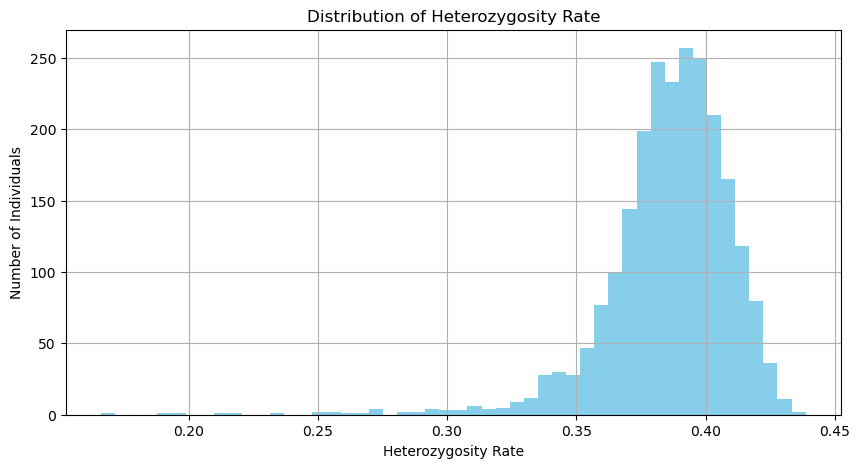

Number of outliers: 32
Outliers: col_label            chr_1_pos_88671  chr_1_pos_114576  chr_1_pos_115699  chr_1_pos_155552  chr_1_pos_175528  chr_1_pos_181280  chr_1_pos_201670  chr_1_pos_261558  chr_1_pos_277357  chr_1_pos_298436  ...  chr_5_pos_99141416  chr_5_pos_99172858  chr_5_pos_99213046  chr_5_pos_99233297  chr_5_pos_99426456  chr_5_pos_99471982  chr_5_pos_99610295  chr_5_pos_99766772  chr_5_pos_99812870  heterozygosity
MP_5_FP_8_SEX_F                    2                 2                 2                 1                 2                 2                 2                 2                 2                 0  ...                   2                   0                   1                   1                   1                   0                   1                   1                   2        0.272057
MP_5_FP_8_SEX_F                    2                 2                 2                 1                 2                 2                 2                 2     

In [163]:
import matplotlib.pyplot as plt

heterozygosity_check_df = genotypes_df_sub.copy()
heterozygosity_check_df.drop(columns=['Q', 'B'], inplace=True)
# Heterozygosity rate = (# heterozygous SNPs) / (# non-missing SNPs)
heterozygosity_rate = (heterozygosity_check_df == 1).sum(axis=1) / heterozygosity_check_df.notna().sum(axis=1)

# Add to original dataframe
heterozygosity_check_df['heterozygosity'] = heterozygosity_rate

# Plot
plt.figure(figsize=(10, 5))
plt.hist(heterozygosity_rate, bins=50, color='skyblue')
plt.xlabel('Heterozygosity Rate')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Heterozygosity Rate')
plt.grid(True)
plt.show()

# Detect outliers (e.g., 3 standard deviations from mean)
mean_hr = heterozygosity_rate.mean()
std_hr = heterozygosity_rate.std()

outliers = heterozygosity_check_df[(heterozygosity_check_df['heterozygosity'] < mean_hr - 3*std_hr) |
                                    (heterozygosity_check_df['heterozygosity'] > mean_hr + 3*std_hr)]
print("Number of outliers:", len(outliers))
print("Outliers:", outliers)
outlier_samples = list(outliers.index)
print("Outliers:", outlier_samples)


### 32 Outlier samples detected with low Heterozygosity 

A heterozygosity check reveals individuals with low genetic variation, possibly due to sample contamination or inbreeding.

In [211]:

filtered_genotype_df_sub = genotypes_df_sub[(heterozygosity_check_df['heterozygosity'] >= mean_hr - 3*std_hr) &
                                    (heterozygosity_check_df['heterozygosity'] <= mean_hr + 3*std_hr)]

filtered_genotype_df_sub

col_label,chr_1_pos_88671,chr_1_pos_114576,chr_1_pos_115699,chr_1_pos_155552,chr_1_pos_175528,chr_1_pos_181280,chr_1_pos_201670,chr_1_pos_261558,chr_1_pos_277357,chr_1_pos_298436,...,chr_5_pos_99172858,chr_5_pos_99213046,chr_5_pos_99233297,chr_5_pos_99426456,chr_5_pos_99471982,chr_5_pos_99610295,chr_5_pos_99766772,chr_5_pos_99812870,Q,B
MP_0_FP_0_SEX_M,2,2,1,1,2,1,2,1,1,0,...,0,2,2,2,0,1,1,2,64.22,0
MP_0_FP_0_SEX_M,1,1,0,1,1,1,1,1,2,0,...,0,1,2,2,0,1,0,1,88.88,1
MP_0_FP_0_SEX_M,1,2,0,1,1,1,2,0,0,0,...,0,2,0,1,0,1,1,2,64.02,0
MP_0_FP_0_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,2,2,0,1,1,2,68.51,0
MP_0_FP_0_SEX_M,2,1,1,1,2,2,1,2,2,0,...,0,0,2,2,0,0,0,2,61.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MP_1150_FP_1125_SEX_M,1,1,1,2,2,2,1,2,2,0,...,0,1,1,1,0,1,1,2,65.93,0
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,0,1,2,2,0,0,0,2,69.36,0
MP_1150_FP_1125_SEX_M,2,2,0,0,1,0,2,0,1,0,...,0,1,1,1,0,1,1,2,74.89,0
MP_1150_FP_1125_SEX_F,2,2,0,0,1,0,2,0,1,0,...,0,2,2,2,0,1,1,2,75.94,0


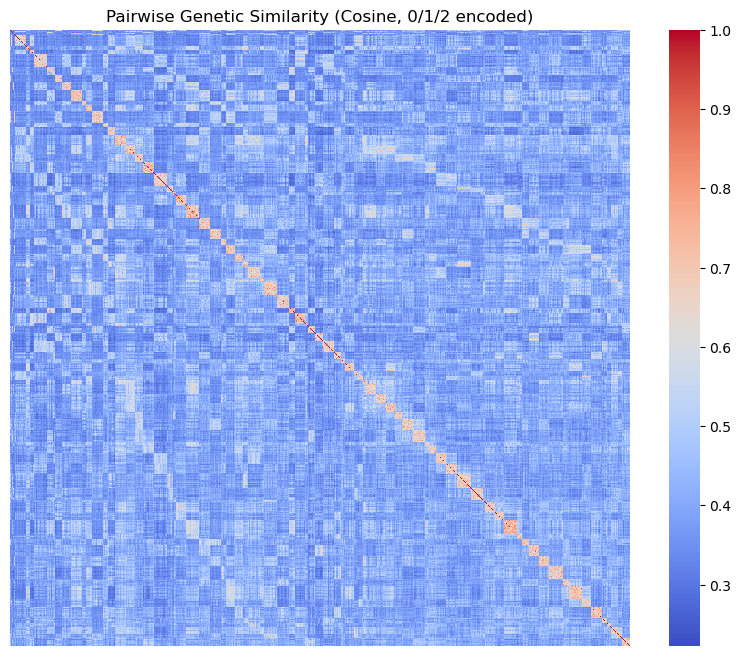

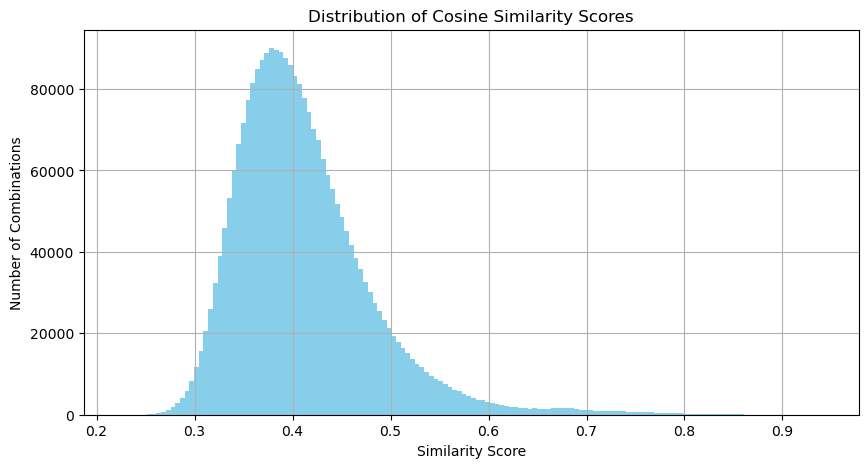

Highly similar individuals (possible duplicates/relatives): >95%
Number of highly similar pairs: 0


In [212]:
genotypes_df_sub_allele = filtered_genotype_df_sub.copy()
genotypes_df_sub_allele.drop(columns=['Q', 'B'], inplace=True)


import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with:
# - One row per individual
# - One column per SNP
# - Genotypes encoded as 0, 1, 2 (after dropping ID column)

genotype_matrix = genotypes_df_sub_allele.to_numpy()

# Normalize genotype values if needed (mean-center)
# For correlation-based similarity
norm_genotypes = (genotype_matrix - genotype_matrix.mean(axis=1, keepdims=True))

# Compute pairwise cosine similarity (can also use 1 - normalized euclidean or Hamming)
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(norm_genotypes)

# Create a DataFrame for easy viewing
sim_df = pd.DataFrame(similarity_matrix, index=genotypes_df_sub_allele.index, columns=genotypes_df_sub_allele.index)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sim_df, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Pairwise Genetic Similarity (Cosine, 0/1/2 encoded)")
plt.show()

# Identify pairs with very high similarity (e.g., > 0.98)
threshold = 0.95
high_sim_pairs = []
all_sims = []
ids = genotypes_df_sub_allele.index.values
for i in range(len(ids)):
    for j in range(i+1, len(ids)):
        sim = similarity_matrix[i, j]
        all_sims.append(sim)
        if sim > threshold:
            high_sim_pairs.append((ids[i], ids[j], sim))


plt.figure(figsize=(10, 5))
plt.hist(all_sims, bins=150, color='skyblue')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Combinations')
plt.title('Distribution of Cosine Similarity Scores')
plt.grid(True)
plt.show()

print("Highly similar individuals (possible duplicates/relatives): >95%")
for pair in high_sim_pairs:
    print(pair)
print("Number of highly similar pairs:", len(high_sim_pairs))

### We observe a lot of individuals with > 0.5 similarity but this is possible as our population is all related (5 generations): Sign of Kinship/Ancestry
### We have no samples with more than 95% similarity -> NO duplicates

High genetic similarity is noted, expected due to known familial relationships within the cohort.

This confirms that there are no duplicate individuals in the dataset, ensuring unique data entries.

# SNP Level QC checks

This section performs quality control checks on SNPs to filter out those that might bias or reduce the validity of the results.

### Minor Allele frequency (MAF)

Analysis of the frequency of minor alleles across SNPs to identify rare variants.

In [213]:
genotypes_df_maf = filtered_genotype_df_sub.copy()
genotypes_df_maf.drop(columns=['Q', 'B'], inplace=True)

In [ ]:
def calculate_maf(genotype_data):
    # Calculate the frequency of each genotype (0, 1, 2) for each SNP
    #allele_counts = genotype_data.apply(pd.Series.value_counts, axis=0).fillna(0)
    #
    ## MAF = min(frequency of minor allele (either 0 or 2)) / total
    #maf = allele_counts.apply(lambda x: min(x[0], x[2]) / sum(x), axis=0)
    #minor_allele_counts = np.sum(genotype_matrix, axis=0)

    num_individuals = genotype_data.shape[0]
    
    # Sum the values for each SNP column (this gives us the number of minor alleles per SNP)
    minor_allele_counts = genotype_data.sum()
    
    # Calculate MAF (minor alleles count / (2 * number of individuals))
    maf = minor_allele_counts / (2 * num_individuals)
    
    return maf

maf_values = calculate_maf(genotypes_df_maf)
low_maf_threshold = 0.01
filtered_snps = maf_values[maf_values > low_maf_threshold].index


In [258]:
filtered_snps = filtered_snps.append(filtered_genotype_df_sub[['Q','B']].columns)
#filtered_genotype_df_sub[['Q','B']].columns
filtered_snps

Index(['chr_1_pos_88671', 'chr_1_pos_114576', 'chr_1_pos_115699', 'chr_1_pos_155552', 'chr_1_pos_175528', 'chr_1_pos_181280', 'chr_1_pos_201670', 'chr_1_pos_261558', 'chr_1_pos_277357', 'chr_1_pos_309705',
       ...
       'chr_5_pos_99117225', 'chr_5_pos_99141416', 'chr_5_pos_99213046', 'chr_5_pos_99233297', 'chr_5_pos_99426456', 'chr_5_pos_99610295', 'chr_5_pos_99766772', 'chr_5_pos_99812870', 'Q', 'B'], dtype='object', name='col_label', length=9883)

In [259]:
print(len(maf_values))
print(len(filtered_snps))
print(1 - len(filtered_snps)/len(maf_values))
print(len(maf_values) -len(filtered_snps))

10031
9883
0.014754261788455736
148


### 150 SNPs have less than 1% MAF
#### These consist of 1.4% of the SNPs in the dataset

SNPs with very low minor allele frequency are identified as they might contribute less to statistical power.

A quantitative summary showing that a small fraction of SNPs fall below the MAF threshold.

### Monomorphic SNPs

Monomorphic SNPs have no variation across individuals and are typically removed from analyses.

In [260]:
maf_filtered_snps = filtered_genotype_df_sub[filtered_snps]
genotypes_df_mono = maf_filtered_snps.copy()
#genotypes_df_mono.drop(columns=['Q', 'B'], inplace=True)

In [261]:

# Convert to DataFrame
genotype_df = pd.DataFrame(genotypes_df_mono)

# Identify monomorphic SNPs (those with the same value across all rows)
monomorphic_snps = genotype_df.nunique() == 1

# Filter out monomorphic SNPs
filtered_genotype_df = genotype_df.loc[:, ~monomorphic_snps]

# Print the filtered DataFrame
print("Filtered Genotype DataFrame (without monomorphic SNPs):")
print(filtered_genotype_df)


Filtered Genotype DataFrame (without monomorphic SNPs):
col_label              chr_1_pos_88671  chr_1_pos_114576  chr_1_pos_115699  chr_1_pos_155552  chr_1_pos_175528  chr_1_pos_181280  chr_1_pos_201670  chr_1_pos_261558  chr_1_pos_277357  chr_1_pos_309705  ...  chr_5_pos_99117225  chr_5_pos_99141416  chr_5_pos_99213046  chr_5_pos_99233297  chr_5_pos_99426456  chr_5_pos_99610295  chr_5_pos_99766772  chr_5_pos_99812870      Q  B
MP_0_FP_0_SEX_M                      2                 2                 1                 1                 2                 1                 2                 1                 1                 2  ...                   1                   0                   2                   2                   2                   1                   1                   2  64.22  0
MP_0_FP_0_SEX_M                      1                 1                 0                 1                 1                 1                 1                 1                 2          

In [262]:
filtered_genotype_df['Q'].describe()

count    2294.000000
mean       68.683976
std        10.050291
min        35.000000
25%        61.975000
50%        68.720000
75%        75.427500
max       100.750000
Name: Q, dtype: float64

### Trial with no penalty

A baseline regression model is fit without any regularization penalty to serve as a comparison point.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

# X: genotype matrix (0/1/2), y: binary trait (0 or 1)
# Drop ID column if present
X = filtered_genotype_df.drop(columns=['Q', 'B'])  # SNPs as features
y = filtered_genotype_df["Q"]  # binary target (0/1)

# Normalize features before penalization
pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(
#        Cs=10,            # Grid of inverse regularization strengths
        cv=5,             # 5-fold cross-validation
#        penalty='l1',     # L1 = Lasso
#        solver='saga',    # Solver that supports L1
#        scoring='accuracy',
        max_iter=5000,
        n_jobs=-1,
        random_state=42
    )
)

# Fit model
pipeline.fit(X, y)

# Extract logistic model from pipeline
log_reg = pipeline.named_steps['LassoCV']
coefs = log_reg.coef_.flatten()

# Get SNPs with non-zero coefficients (associated with trait)
snp_names = X.columns
selected_snps = snp_names[coefs != 0]
snp_importance = pd.Series(coefs[coefs != 0], index=selected_snps).sort_values(key=abs, ascending=False)

print("Top associated SNPs:")
print(snp_importance.head(10))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.039e+01, tolerance: 1.832e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+01, tolerance: 1.874e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.852e+01, toler

KeyError: 'logisticregressioncv'

In [376]:
log_reg = pipeline.named_steps['lassocv']
coefs = log_reg.coef_.flatten()

# Get SNPs with non-zero coefficients (associated with trait)
snp_names = X.columns
selected_snps = snp_names[coefs != 0]
snp_importance = pd.Series(coefs[coefs != 0], index=selected_snps).sort_values(key=abs, ascending=False)

print("Top associated SNPs:")
print(snp_importance.head(10))


Top associated SNPs:
col_label
chr_3_pos_22030629    1.735610
chr_3_pos_71610807   -1.271005
chr_1_pos_50009335   -0.887471
chr_3_pos_13406503   -0.707098
chr_1_pos_43860448    0.551497
chr_4_pos_97774814    0.543311
chr_4_pos_47195299    0.504371
chr_3_pos_66205673   -0.487106
chr_2_pos_40426441    0.480871
chr_2_pos_37933865    0.456335
dtype: float64


### Trial with L1 penalization (Completed on RED as comute was not sufficient)

An L1-regularized model (Lasso) is tested to induce sparsity and identify important SNPs. Due to computational constraints, this was executed on a remote server.

In [395]:
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

# Replace X, y with your feature matrix and target vector
# X = ...
# y = ...

alphas = [0.1]
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

results = []
coeffs = []
for l1_ratio in alphas:
    print(f"Processing α = {l1_ratio}")
    enet_cv = ElasticNetCV(l1_ratio=l1_ratio, cv=cv, n_alphas=100, random_state=42)
    enet_cv.fit(X, y)

    mse_mean = enet_cv.mse_path_.mean(axis=1)
    mse_std = enet_cv.mse_path_.std(axis=1)
    
    min_idx = np.argmin(mse_mean)
    mse_min = mse_mean[min_idx]
    mse_1se = mse_min + mse_std[min_idx]
    
    # Get the most regularized model within 1SE
    one_se_idx = np.where(mse_mean <= mse_1se)[0][-1]
    lambda_1se = enet_cv.alphas_[one_se_idx]

    # Re-fit with the selected lambda and l1_ratio to get final coefficients
    from sklearn.linear_model import ElasticNet
    enet_final = ElasticNet(alpha=lambda_1se, l1_ratio=l1_ratio, random_state=42)
    enet_final.fit(X, y)
    n_selected = np.sum(enet_final.coef_ != 0)
    coeffs.append(enet_final.coef_)
    print(f"l1_ratio: {l1_ratio}, λ_1SE: {lambda_1se}, n_selected_1SE: {n_selected}")
    results.append({
        'alpha': l1_ratio,
        'lambda_minMSE': enet_cv.alpha_,
        'lambda_1SE': lambda_1se,
        'n_selected_1SE': n_selected
    })

# Display results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


Processing α = 0.1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.407e+01, tolerance: 2.084e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+01, tolerance: 2.075e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.307e+01, toler

KeyboardInterrupt: 

In [377]:
len(selected_snps)

243

In [378]:
print(snp_importance.head(50))


col_label
chr_3_pos_22030629    1.735610
chr_3_pos_71610807   -1.271005
chr_1_pos_50009335   -0.887471
chr_3_pos_13406503   -0.707098
chr_1_pos_43860448    0.551497
chr_4_pos_97774814    0.543311
chr_4_pos_47195299    0.504371
chr_3_pos_66205673   -0.487106
chr_2_pos_40426441    0.480871
chr_2_pos_37933865    0.456335
chr_5_pos_78030673   -0.449030
chr_2_pos_79585926   -0.448369
chr_2_pos_1809978     0.448024
chr_2_pos_32741451    0.445439
chr_1_pos_9916956     0.444911
chr_1_pos_49879119    0.427905
chr_2_pos_29502248    0.421072
chr_1_pos_37626438   -0.416887
chr_3_pos_45617940    0.416816
chr_3_pos_23590158    0.407535
chr_2_pos_65270284    0.406875
chr_1_pos_57125254   -0.399860
chr_2_pos_95068025   -0.395178
chr_1_pos_50316379   -0.375576
chr_1_pos_57518347   -0.370288
chr_5_pos_62280008    0.350413
chr_2_pos_96394541    0.345073
chr_1_pos_48590623    0.333947
chr_2_pos_83769429   -0.326326
chr_3_pos_27909907   -0.323573
chr_3_pos_71399052   -0.323412
chr_3_pos_9144359    -0.32271

In [393]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y, y_pred_class)
rms

6.949711901705054

In [279]:
filtered_genotype_df.to_csv('processed_raw_data.csv', header=True)

In [280]:
! pip install rpy2

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.17-cp312-cp312-macosx_11_0_arm64.whl size=252725 sha256=b1c0ce95ec319b5d4545de8878d42974c34ba173e97951febb1301ddee325237
  Stored in directory: /Users/pranaybandaru/Library/Caches/pip/wheels/fb/3c/a8/5c2ab28ca010aa26f09174d6ac337141721ee764f7b17c0953
Successfully built rpy2


## L0 Implementation trials

Experiments with L0 regularization are conducted, focusing on variable selection under sparsity constraints.

In [281]:
import numpy as np
import pandas as pd
from rpy2.robjects import numpy2ri, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import r

# Enable automatic conversion between numpy/pandas and R
numpy2ri.activate()
pandas2ri.activate()

### L0 using L0Learn ( R package using rpy2)

Implementation of L0 regularization using the `L0Learn` R package, interfaced via `rpy2` in Python.

In [ ]:
L0Learn = importr('L0Learn')

# Assume X and y are your pandas DataFrame and Series
# Make sure they’re numeric
X_np = X
y_np = filtered_genotype_df["Q"].to_numpy(dtype='float64')  # binary target (0/1) #.to_numpy(dtype='float64')

# Fit the L0-penalized logistic regression model
fit = L0Learn.L0Learn_fit(
    X_np,
    y_np,
    penalty="L0",
    maxSuppSize=150,         # Max number of selected features (you can tune this)
    nLambda=100             # Number of lambda values (regularization strengths)
    #nFolds=5            # Number of cores to use
)

print("Support sizes (number of selected features):")
print(r['sapply'](fit.rx2('beta'), r['length']))  # How many features were selected at each lambda

# Pick a model (e.g., the first one) and extract non-zero coefficients
best_model = fit.rx2("fit").rx2(0)  # Get beta for the first lambda
#selected_snps = np.flatnonzero(np.abs(np.array(beta_matrix)) > 1e-6)

#print("Selected SNP indices:", selected_snps)

In [ ]:
from rpy2.robjects.packages import importr
L0Learn = importr("L0Learn")

cvfit = L0Learn.L0Learn_cvfit(
    X_np, y_np,
    loss="Logistic",
    penalty="L0",
    maxSuppSize=150,
    nLambda=100,
    nFolds=5,
    seed=42
)

# Get the best model selected by CV
best_model = cvfit.rx2("fit").rx2(0)  # or cvfit.get_best_model() if you're using the helper
best_beta_matrix = best_model.rx2("beta")[0]

In [337]:
import numpy as np
from rpy2.robjects import r, default_converter
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri

# Enable conversion
numpy2ri.activate()

# Import R's Matrix package
Matrix = importr("Matrix")

# Extract beta list from fit object
beta_list = fit.rx2("beta")

# Extract first beta sparse vector (dgCMatrix)
beta_sparse = beta_list[0]

# Convert sparse matrix to dense R matrix
beta_dense = r['as.matrix'](beta_sparse)

# Convert R matrix to NumPy array
with localconverter(default_converter + numpy2ri.converter):
    beta_np = np.asarray(beta_dense)

# Identify selected SNPs with non-zero coefficients
selected_snps = np.flatnonzero(np.abs(beta_np) > 1e-6)
print("Selected SNP indices:", selected_snps)


Selected SNP indices: [  1403   1404   1405 ... 418774 418775 418776]


In [338]:
len(selected_snps)

1901

### Studying the impact of parameters on Eror term


Exploration of how tuning parameters in the L0 model affect prediction error and model performance.

In [ ]:
import numpy as np
import pandas as pd
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

# Activate pandas-R data conversion
pandas2ri.activate()

# Import necessary R packages
L0Learn = importr("L0Learn")

# Your data: X is a pandas DataFrame or numpy array, y is a Series or array
# Let's assume you've defined X and y in Python
# Convert to R
X_np = np.array(X)
y_np = np.array(y)

# Convert to R objects
X_r = numpy2ri.py2rpy(X_np)
y_r = numpy2ri.py2rpy(y_np)


# Define parameters
n_repeats = 10
n_folds = 10
best_lambdas = []
selected_predictors_counts = []

for i in range(n_repeats):
    print(f"Running CV repeat {i+1}/{n_repeats}")
    cv_fit = L0Learn.L0Learn_cvfit(
        X_r, y_r,
        loss="SquaredError",
        penalty="L0",
        maxSuppSize=100,       # adjust based on expected number of predictors
        nFolds=n_folds,
        nLambda = 10,
        seed=i + 42            # different seed each time
    )

    # Extract CV means and SEs
    mean_mse = np.array(cv_fit.rx2("cvMeans")[0])
    se_mse = np.array(r["as.numeric"](cv_fit.rx2("cvSEs")))
    lambdas = np.array(r["as.numeric"](cv_fit.rx2("lambdas")[[0]]))  # since it's a list

    # Identify lambda using 1SE rule
    min_index = np.argmin(mean_mse)
    threshold = mean_mse[min_index] + se_mse[min_index]
    one_se_index = np.where(mean_mse <= threshold)[0][0]

    best_lambda = lambdas[one_se_index]
    best_lambdas.append(best_lambda)

    # Count number of selected predictors at that lambda
    model = L0Learn.fit(X_r, y_r, loss="SquaredError", penalty="L0", maxSuppSize=100)
    coef_matrix = np.array(r["as.matrix"](L0Learn.coef(model, lambda_=best_lambda)[0]))
    n_selected = np.sum(coef_matrix != 0)
    selected_predictors_counts.append(n_selected)

# Report average lambda and predictor counts
print(f"\nAverage lambda (at minMSE + 1SE): {np.mean(best_lambdas)}")
print(f"Average number of selected predictors: {np.mean(selected_predictors_counts)}")



Running CV repeat 1/10


R[write to console]: Error: 'list' object cannot be coerced to type 'double'



RRuntimeError: Error: 'list' object cannot be coerced to type 'double'


In [ ]:
X = filtered_genotype_df.drop(columns=['Q', 'B'])  # SNPs as features

X.shape

(2294, 9751)

In [477]:
print(type(cv_fit.rx2("fit")[0]))
print(list(cv_fit.rx2("fit")[0]))

<class 'rpy2.robjects.vectors.ListVector'>
[<rpy2.robjects.methods.RS4 object at 0x34da5c4d0> [25]
R classes: ('dgCMatrix',)]


In [ ]:
print(cv_fit.rx2("fit").rx2("beta")) # Coeff matrix
print(cv_fit.rx2("fit").rx2("a0")) # intercept sequences
print(cv_fit.rx2("fit").rx2("lambda")) # list of labda sequences
print(cv_fit.rx2("fit").rx2("suppSize")) # list of support size sequences

     [,1]                                                  
[1,] <S4 class ‘dgCMatrix’ [package “Matrix”] with 6 slots>

[[1]]
 [1] 68.68398 65.08091 61.52816 65.13406 66.68526 67.88041 67.23489 69.89153
 [9] 71.85222 70.15645 69.07132 74.07168 70.02158 70.84087 63.52287 62.30334
[17] 62.15046 62.60251 62.36200 70.30191 71.08560 69.39415 70.47005 69.70491
[25] 68.55655 72.42249 73.15532 76.11331 75.91101 76.03749 75.14347 74.89451
[33] 74.49977 68.70368 71.34050 80.11215 79.83508


[[1]]
 [1] 0.039263200 0.038870600 0.020977100 0.014955600 0.012167400 0.011371300
 [7] 0.008654750 0.006634030 0.005065060 0.005002600 0.003614330 0.003143910
[13] 0.002503040 0.002368920 0.002059640 0.001892260 0.001626340 0.001523390
[19] 0.001494860 0.001411760 0.001187120 0.001040450 0.000829882 0.000821209
[25] 0.000775479 0.000741741 0.000642054 0.000590219 0.000582876 0.000502987
[31] 0.000494682 0.000391306 0.000385203 0.000329347 0.000320308 0.000291235
[37] 0.000256471


[[1]]
 [1]  0  2  3  4  5 

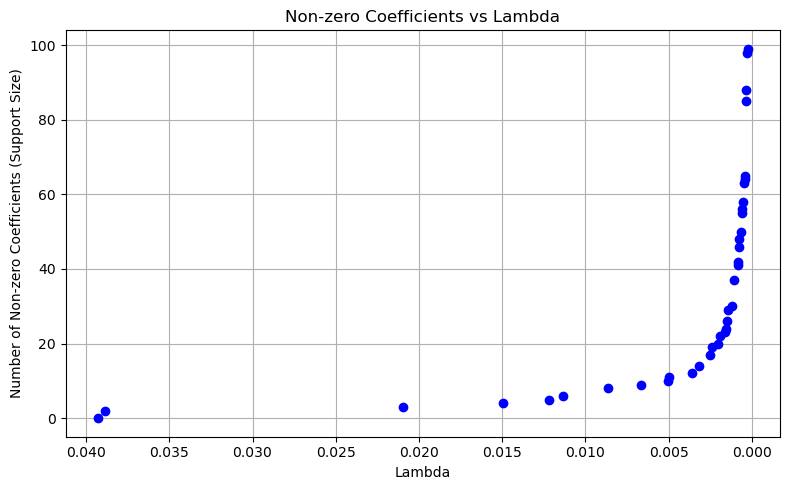

In [508]:
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import r

# Extract the components from cv_fit
lambda_seq = np.array(cv_fit.rx2("fit").rx2("lambda"))  # Lambda sequence
supp_size = np.array(cv_fit.rx2("fit").rx2("suppSize"))  # Support sizes (non-zero coefficients)

# Check if lambda_seq and supp_size have the same length (should match the number of models)
assert len(lambda_seq) == len(supp_size), "Mismatch between lambda and support size lengths"

# Plot the number of non-zero coefficients (support size) vs lambda
plt.figure(figsize=(8, 5))
plt.plot(lambda_seq, supp_size, marker='o', color='b')
plt.xlabel('Lambda')
plt.ylabel('Number of Non-zero Coefficients (Support Size)')
plt.title('Non-zero Coefficients vs Lambda')
plt.gca().invert_xaxis()  # Larger lambdas mean stronger regularization (fewer non-zero coefficients)
plt.grid(True)
plt.tight_layout()
plt.show()


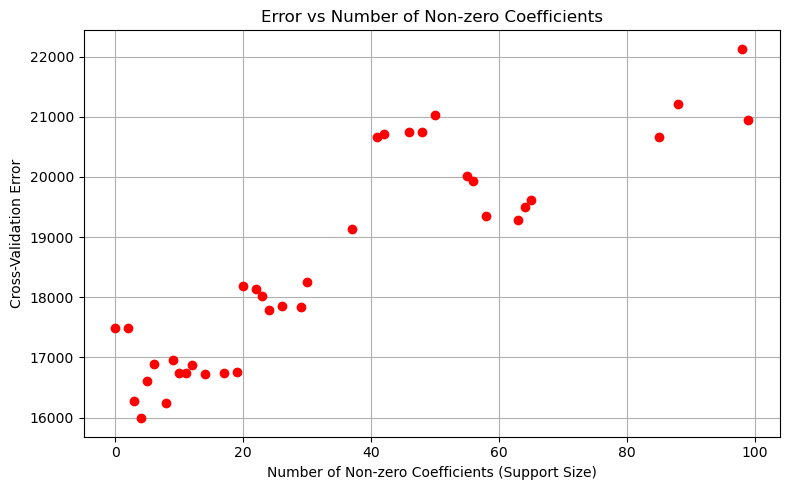

In [519]:
cv_error = np.array(cv_fit.rx2("cvMeans")) 


# Check that lengths match
assert len(lambda_seq) == len(supp_size) == len(cv_error), "Mismatch between data lengths!"

# Plot Error vs Number of Non-zero Coefficients (Support Size)
plt.figure(figsize=(8, 5))
plt.plot(supp_size, cv_error, marker='o', color='r')
plt.xlabel('Number of Non-zero Coefficients (Support Size)')
plt.ylabel('Cross-Validation Error')
plt.title('Error vs Number of Non-zero Coefficients')
plt.grid(True)
plt.tight_layout()
plt.show()

In [514]:
len(lambda_seq[0])

37

In [517]:
len(supp_size[0])

37

### L0Learn using 10 fold cross validation

Cross-validation is employed to assess the stability and performance of the L0 model.

Running CV repeat 1/10
Running CV repeat 2/10
Running CV repeat 3/10
Running CV repeat 4/10
Running CV repeat 5/10
Running CV repeat 6/10
Running CV repeat 7/10
Running CV repeat 8/10
Running CV repeat 9/10
Running CV repeat 10/10

Average lambda (at minMSE + 1SE): 0.0035825851945454545
Average number of selected predictors: 96.47272727272727


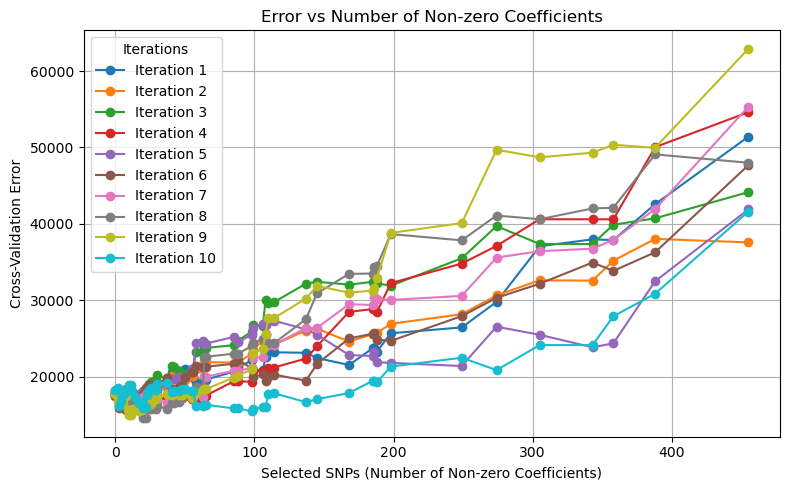

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import r

# Define parameters
n_repeats = 10
n_folds = 10
best_lambdas = []
selected_predictors_counts = []
cv_errors = []  # To store errors for plotting

for i in range(n_repeats):
    print(f"Running CV repeat {i+1}/{n_repeats}")
    
    # Cross-validation fit with L0Learn
    cv_fit = L0Learn.L0Learn_cvfit(
        X_r, y_r,
        loss="SquaredError",
        penalty="L0",
        maxSuppSize=500,  
        nFolds=n_folds,
        nLambda=100,
        seed=i + 42  # different seed each time
    )
    
    # Extract the required components from cv_fit
    fit_list = cv_fit.rx2("fit")
    
    lambdas = np.array(fit_list.rx2("lambda"))
    
    supp_size = np.array(fit_list.rx2("suppSize"))
    
    beta_matrix = np.array((fit_list.rx2("beta")[0]))
    
    mean_mse = np.array(cv_fit.rx2("cvMeans"))  # Assuming cvMeans are available
    
    min_index = np.argmin(mean_mse)
    threshold = mean_mse[0][min_index] + np.array((cv_fit.rx2("cvSDs")))[0][min_index]
    one_se_index = np.where(mean_mse <= threshold)[0][0]
    
    best_lambda = lambdas[one_se_index]
    best_lambdas.append(best_lambda)
    
    n_selected = supp_size[one_se_index]  # Number of selected predictors at the best lambda
    selected_predictors_counts.append(n_selected)
    
    cv_error = mean_mse[one_se_index]  # Error at best lambda (1SE rule)
    cv_errors.append(cv_error)

print(f"\nAverage lambda (at minMSE + 1SE): {np.mean(best_lambdas)}")
print(f"Average number of selected predictors: {np.mean(selected_predictors_counts)}")

plt.figure(figsize=(8, 5))

for i in range(n_repeats):
    plt.plot(selected_predictors_counts[i], cv_errors[i], marker='o', label=f'Iteration {i+1}')

plt.xlabel('Selected SNPs (Number of Non-zero Coefficients)')
plt.ylabel('Cross-Validation Error')
plt.title('Error vs Number of Non-zero Coefficients')
plt.grid(True)
plt.legend(title="Iterations")
plt.tight_layout()
plt.show()

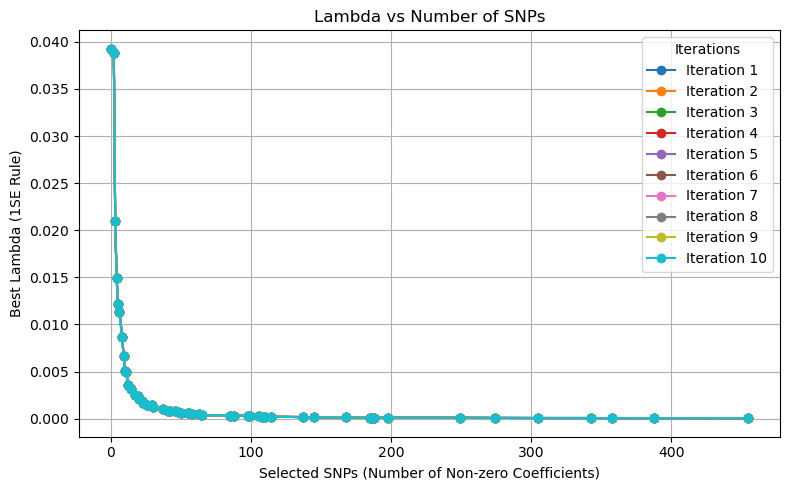

In [ ]:
import math
plt.figure(figsize=(8, 5))

for i in range(n_repeats):
    plt.plot(selected_predictors_counts[i], best_lambdas[i], marker='o', label=f'Iteration {i+1}')

plt.xlabel('Selected SNPs (Number of Non-zero Coefficients)')
plt.ylabel('Best Lambda (1SE Rule)')
plt.title('Lambda vs Number of SNPs')
plt.grid(True)
plt.legend(title="Iterations")
plt.tight_layout()
plt.show()

In [841]:
one_se_index

0

In [876]:
# Suppose you want the coefficients for the best lambda (index = one_se_index)
beta_sparse = beta_list[0]

# Convert sparse matrix to dense
beta_dense = r['as.matrix'](beta_sparse)

# Convert to NumPy array
with localconverter(default_converter + numpy2ri.converter):
    beta_np = np.asarray(beta_dense)[:,20]  # Shape: (n_features,)

# Sanity check
assert beta_np.shape[0] == X.shape[1], "Mismatch in feature dimensions!"

# Identify non-zero coefficients
selected_snps = np.flatnonzero(np.abs(beta_np) > 1e-6)
selected_coeffs = beta_np[selected_snps]

# Sort by magnitude
sorted_indices = np.argsort(-np.abs(selected_coeffs))
sorted_snps = selected_snps[sorted_indices]
sorted_coeffs = selected_coeffs[sorted_indices]

# Get column names
sorted_column_names = X.columns[sorted_snps]

# Print
print("Selected SNPs (sorted by |coefficient|):")
for name, coeff in zip(sorted_column_names, sorted_coeffs):
    print(f"SNP: {name}, Coefficient: {coeff}")



Selected SNPs (sorted by |coefficient|):
SNP: chr_3_pos_71610807, Coefficient: -3.815743190883665
SNP: chr_3_pos_22030629, Coefficient: 3.7829052608729454
SNP: chr_2_pos_20369230, Coefficient: -3.4857811533733423
SNP: chr_1_pos_50009335, Coefficient: -3.2903706233312344
SNP: chr_5_pos_1173286, Coefficient: 3.1201519175117647
SNP: chr_1_pos_54538434, Coefficient: 3.007091963014093
SNP: chr_4_pos_97774814, Coefficient: 2.7760031648306276
SNP: chr_2_pos_32741451, Coefficient: 2.749648106651301
SNP: chr_2_pos_62411230, Coefficient: -1.954613078285129
SNP: chr_3_pos_26563631, Coefficient: -1.9400517528627828
SNP: chr_2_pos_95450676, Coefficient: -1.8610502330100809
SNP: chr_1_pos_53722226, Coefficient: -1.7849876343041609
SNP: chr_1_pos_7498198, Coefficient: 1.7004496838324397
SNP: chr_1_pos_37626438, Coefficient: -1.6723202160801836
SNP: chr_2_pos_83411933, Coefficient: -1.6437505181002965
SNP: chr_1_pos_71885177, Coefficient: 1.624872798198552
SNP: chr_1_pos_9916956, Coefficient: 1.609977

In [871]:
beta_np[:,30].shape

(9751,)

In [ ]:
# beta_matrix is actually a list of dgCMatrix (1 per lambda)
# So first get the beta at the best lambda index (one_se_index)
beta_r = beta_matrix[one_se_index]  # This is still an R dgCMatrix object (RS4)

# Convert to scipy sparse matrix
def r_dgCMatrix_to_scipy(r_matrix):
    dims = tuple(r_matrix.do_slot("Dim"))  # (n_rows, n_cols)
    data = np.array(r_matrix.do_slot("x"))
    indices = np.array(r_matrix.do_slot("i"))
    indptr = np.array(r_matrix.do_slot("p"))
    return scipy.sparse.csc_matrix((data, indices, indptr), shape=dims)

beta_sparse = r_dgCMatrix_to_scipy(beta_r)

# Get non-zero coefficients
nonzero_indices = beta_sparse.nonzero()[0]
nonzero_values = beta_sparse.data

# Display summary of selected predictors
print(f"\nSelected predictors at best lambda (index {one_se_index}):")
for idx, val in zip(nonzero_indices, nonzero_values):
    print(f"Predictor Index: {idx}, Coefficient: {val}")

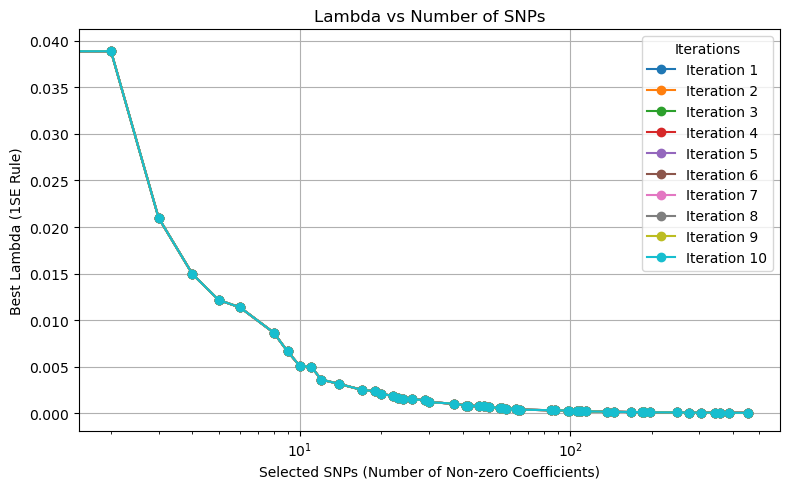

In [ ]:
plt.figure(figsize=(8, 5))

for i in range(n_repeats):
    plt.plot(selected_predictors_counts[i], best_lambdas[i], marker='o', label=f'Iteration {i+1}')

plt.xlabel('Selected SNPs (Number of Non-zero Coefficients)')
plt.ylabel('Best Lambda (1SE Rule)')
plt.xscale('log')
plt.title('Lambda vs Number of SNPs')
plt.grid(True)
plt.legend(title="Iterations")
plt.tight_layout()
plt.show()

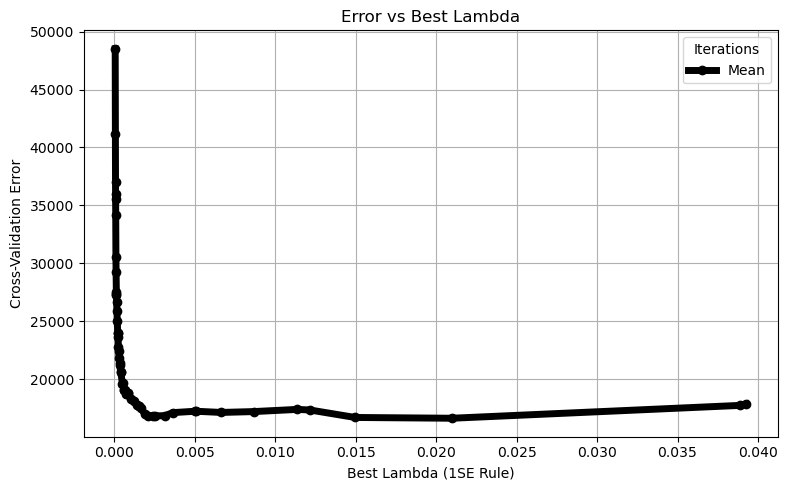

In [613]:
plt.figure(figsize=(8, 5))

#for i in range(n_repeats):
    #plt.plot(best_lambdas[i], cv_errors[i], marker='o', label=f'Iteration {i+1}')
plt.plot(np.mean(best_lambdas,axis=0), np.mean(cv_errors,axis=0), marker='o', label=f'Mean', color='black', linewidth=5)
plt.ylabel('Cross-Validation Error')
plt.xlabel('Best Lambda (1SE Rule)')
plt.title('Error vs Best Lambda')
plt.grid(True)
plt.legend(title="Iterations")
plt.tight_layout()
plt.show()

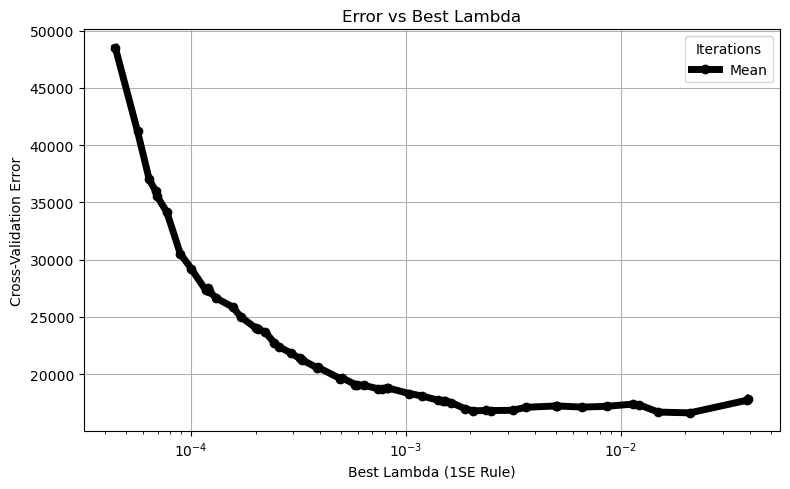

In [620]:
plt.figure(figsize=(8, 5))

#for i in range(n_repeats):
    #plt.plot(best_lambdas[i], cv_errors[i], marker='o', label=f'Iteration {i+1}')
plt.plot(np.mean(best_lambdas,axis=0), np.mean(cv_errors,axis=0), marker='o', label=f'Mean', color='black', linewidth=5)
plt.ylabel('Cross-Validation Error')
plt.xlabel('Best Lambda (1SE Rule)')
plt.xscale('log')
plt.title('Error vs Best Lambda')
plt.grid(True)
plt.legend(title="Iterations")
plt.tight_layout()
plt.show()

In [ ]:
selected_predictors_counts
first_20_selected_predictors_counts = [arr[:2] for arr in selected_predictors_counts]
first_20_selected_predictors_counts

selected_predictors_counts
first_20_selected_predictors_counts = [arr[:2] for arr in selected_predictors_counts]
first_20_selected_predictors_counts

selected_predictors_counts
first_20_selected_predictors_counts = [arr[:2] for arr in selected_predictors_counts]
first_20_selected_predictors_counts

[array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.]),
 array([0., 2.])]

In [610]:
np.mean(cv_errors,axis=0)[0:20]

array([17861.7923509 , 17728.79086521, 16619.59244279, 16687.25418585,
       17328.12171416, 17385.00476925, 17195.08538321, 17121.07823476,
       17223.52912711, 17223.77615526, 17103.90395519, 16844.00258247,
       16819.29416353, 16829.8244122 , 16800.19506611, 16964.4193281 ,
       17522.96788648, 17680.71242258, 17691.70299721, 17726.9229875 ])

In [554]:
np.mean(cv_errors,axis=1)

array([[16740.83865596],
       [17353.37791833],
       [17336.38568011],
       [17225.55992432],
       [17893.4841906 ],
       [16808.96761424],
       [17206.52184083],
       [17310.64071214],
       [16551.18515185],
       [17947.06354012]])

In [616]:
mean_mse

array([[18293.12996098, 18486.83483755, 16213.20172375, 16803.97636103,
        17578.77445462, 17745.94303521, 18132.55522886, 18378.83562154,
        18918.69208884, 18918.69208884, 18166.00406297, 17293.22639536,
        16613.21864961, 16709.60429635, 15951.0051309 , 16041.68859063,
        17566.63621343, 18321.575951  , 18569.86251067, 18211.22750221,
        19075.51023749, 19134.83738745, 17986.1534867 , 18138.44263473,
        18150.91329874, 18332.45643573, 18416.15720258, 18093.81413799,
        18080.54599405, 16227.5123207 , 16120.48044842, 16319.67870358,
        16319.67870358, 15866.4425973 , 15870.04523678, 15457.01525552,
        15761.8933903 , 15976.05223289, 16083.03749547, 17785.50698764,
        17841.5730721 , 16668.77932475, 17067.78764178, 17861.24366112,
        19463.97279858, 19480.79514553, 19264.4153953 , 21320.73334605,
        22486.72184859, 20864.08238718, 24139.43978346, 24139.43978346,
        27916.21604994, 30857.20846942, 41610.10964223]])

In [697]:
import numpy as np
import matplotlib.pyplot as plt
from rpy2.robjects import numpy2ri
import rpy2.robjects as ro
import numpy as np
import pandas as pd

n_repeats = 10
n_folds = 10

# Store results per repeat
all_combinations = []

for i in range(n_repeats):
    print(f"Running CV repeat {i+1}/{n_repeats}")

    # Cross-validation fit
    cv_fit = L0Learn.L0Learn_cvfit(
        X_r, y_r,
        loss="SquaredError",
        penalty="L0",
        maxSuppSize=500,
        nFolds=n_folds,
        nLambda=100,
        seed=i + 42
    )

    fit_list = cv_fit.rx2("fit")
    gammas = list(fit_list.rx2("gamma"))
    cv_means_list = list(cv_fit.rx2("cvMeans"))
    cv_sds_list = list(cv_fit.rx2("cvSDs"))
    lambdas_list = list(fit_list.rx2("lambda"))
    supp_sizes_list = list(fit_list.rx2("suppSize"))

    iter_data = []
    gamma_idx = 0
    gamma = gammas[gamma_idx]
    mse = np.array(cv_means_list[gamma_idx])
    se = np.array(cv_sds_list[gamma_idx])
    lambdas = np.array(lambdas_list[gamma_idx])
    supp_sizes = np.array(supp_sizes_list[gamma_idx])
    min_idx = np.argmin(mse)
    mse_min = mse[min_idx]
    threshold = mse_min + se[min_idx]
    for j in range(len(lambdas)):
        if mse[j] <= threshold:
            iter_data.append({
                "repeat": i + 1,
                "gamma": gamma,
                "lambda": lambdas[j],
                "cv_error": mse[j],
                "support_size": supp_sizes[j]
            })

    df = pd.DataFrame(iter_data)
    all_combinations.append(df)

# Combine all iterations into one dataframe
final_df = pd.concat(all_combinations, ignore_index=True)

# Quick view of results
print(final_df.head())

# Save to CSV (optional)
final_df.to_csv("l0learn_all_combinations_info.csv", index=False)




Running CV repeat 1/10


Exception ignored from cffi callback <function _processevents at 0x169231d00>:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 283, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 


Running CV repeat 2/10
Running CV repeat 3/10
Running CV repeat 4/10
Running CV repeat 5/10
Running CV repeat 6/10
Running CV repeat 7/10
Running CV repeat 8/10
Running CV repeat 9/10
Running CV repeat 10/10
   repeat  gamma    lambda      cv_error  support_size
0       1    0.0  0.039263  17482.397257           0.0
1       1    0.0  0.038871  17482.397257           2.0
2       1    0.0  0.020977  16268.160907           3.0
3       1    0.0  0.014956  15989.021652           4.0
4       1    0.0  0.012167  16604.721725           5.0


In [629]:
lambdas_list

[array([3.92632e-02, 3.88706e-02, 2.09771e-02, 1.49556e-02, 1.21674e-02,
        1.13713e-02, 8.65475e-03, 6.63403e-03, 5.06506e-03, 5.00260e-03,
        3.61433e-03, 3.14391e-03, 2.50304e-03, 2.36892e-03, 2.05964e-03,
        1.89226e-03, 1.62634e-03, 1.52339e-03, 1.49486e-03, 1.41176e-03,
        1.18712e-03, 1.04045e-03, 8.29882e-04, 8.21209e-04, 7.75479e-04,
        7.41741e-04, 6.42054e-04, 5.90219e-04, 5.82876e-04, 5.02987e-04,
        4.94682e-04, 3.91306e-04, 3.85203e-04, 3.29347e-04, 3.20308e-04,
        2.91235e-04, 2.56471e-04, 2.44237e-04, 2.22365e-04, 2.04380e-04,
        2.01092e-04, 1.70499e-04, 1.56469e-04, 1.31417e-04, 1.21487e-04,
        1.19877e-04, 1.17319e-04, 1.00403e-04, 8.92347e-05, 7.73068e-05,
        6.97882e-05, 6.86891e-05, 6.40043e-05, 5.64601e-05, 4.44985e-05])]

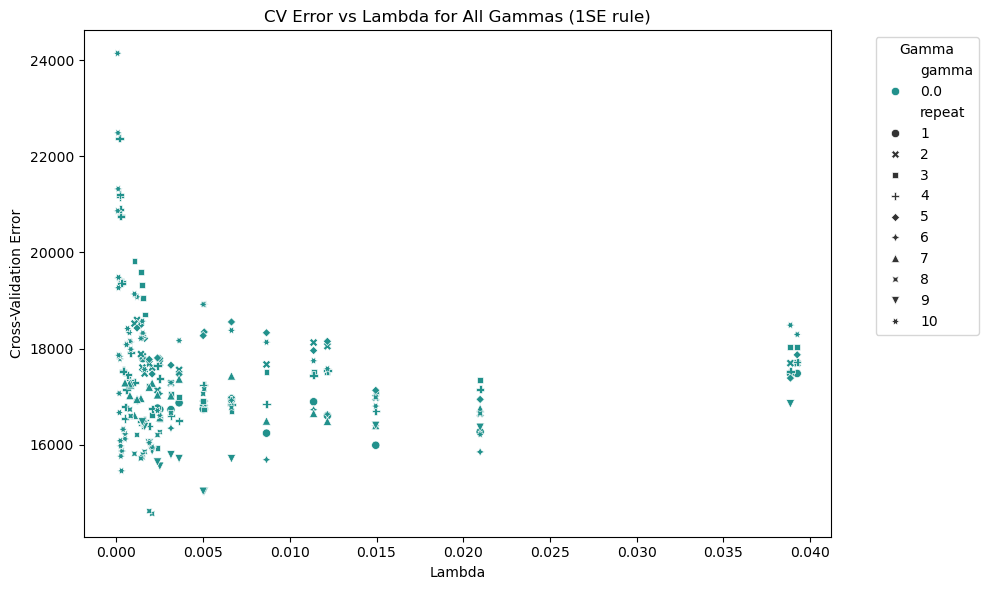

In [632]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x="lambda", y="cv_error", hue="gamma", style="repeat", palette="viridis")
plt.title("CV Error vs Lambda for All Gammas (1SE rule)")
plt.xlabel("Lambda")
plt.ylabel("Cross-Validation Error")
plt.legend(title="Gamma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


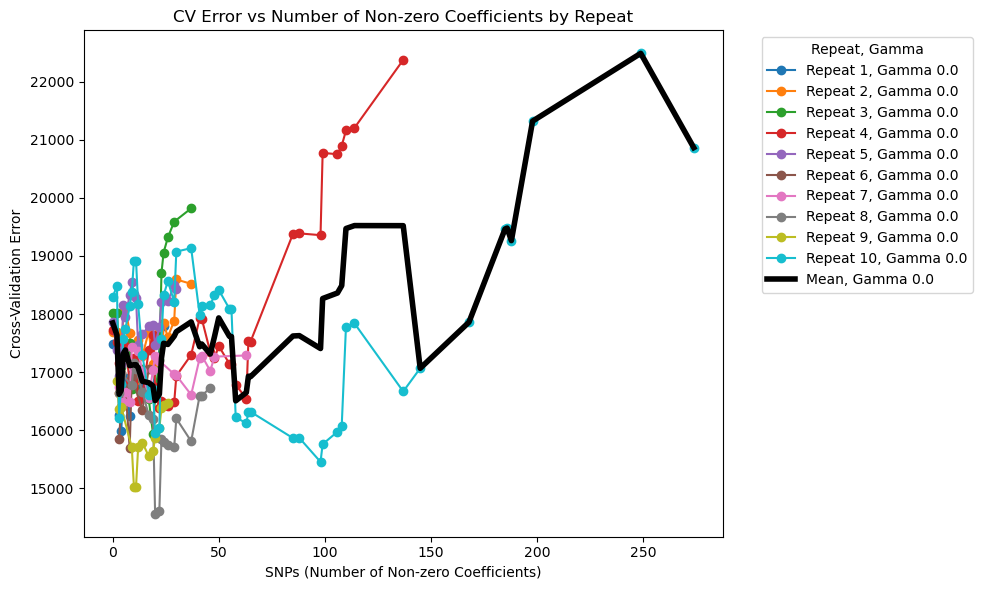

In [649]:
plt.figure(figsize=(10, 6))
for repeat in final_df['repeat'].unique():
    subset = final_df[final_df['repeat'] == repeat]
    for gamma_val in subset['gamma'].unique():
        gamma_subset = subset[subset['gamma'] == gamma_val]
        top_20 = gamma_subset.head(50)
        plt.plot(top_20['support_size'], top_20['cv_error'], marker='o', label=f"Repeat {repeat}, Gamma {gamma_val}")

avg_df = final_df.groupby(['gamma', 'support_size']).agg({'cv_error': 'mean'}).reset_index()
for gamma_val in avg_df['gamma'].unique():
    gamma_avg = avg_df[avg_df['gamma'] == gamma_val].sort_values(by='support_size').head(50)
    plt.plot(gamma_avg['support_size'], gamma_avg['cv_error'], label=f"Mean, Gamma {gamma_val}", linewidth=4, color='black')

plt.title("CV Error vs Number of Non-zero Coefficients by Repeat")
plt.xlabel("SNPs (Number of Non-zero Coefficients)")
plt.ylabel("Cross-Validation Error")
plt.legend(title="Repeat, Gamma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [645]:
final_df

,repeat,gamma,lambda,cv_error,support_size
0,1,0.0,0.039263,17482.397257,0.0
1,1,0.0,0.038871,17482.397257,2.0
2,1,0.0,0.020977,16268.160907,3.0
3,1,0.0,0.014956,15989.021652,4.0
4,1,0.0,0.012167,16604.721725,5.0
...,...,...,...,...,...
230,10,0.0,0.000100,21320.733346,198.0
231,10,0.0,0.000089,22486.721849,249.0
232,10,0.0,0.000077,20864.082387,274.0
233,10,0.0,0.000070,24139.439783,305.0


In [650]:
cv_means_list

[array([18293.12996098, 18486.83483755, 16213.20172375, 16803.97636103,
        17578.77445462, 17745.94303521, 18132.55522886, 18378.83562154,
        18918.69208884, 18918.69208884, 18166.00406297, 17293.22639536,
        16613.21864961, 16709.60429635, 15951.0051309 , 16041.68859063,
        17566.63621343, 18321.575951  , 18569.86251067, 18211.22750221,
        19075.51023749, 19134.83738745, 17986.1534867 , 18138.44263473,
        18150.91329874, 18332.45643573, 18416.15720258, 18093.81413799,
        18080.54599405, 16227.5123207 , 16120.48044842, 16319.67870358,
        16319.67870358, 15866.4425973 , 15870.04523678, 15457.01525552,
        15761.8933903 , 15976.05223289, 16083.03749547, 17785.50698764,
        17841.5730721 , 16668.77932475, 17067.78764178, 17861.24366112,
        19463.97279858, 19480.79514553, 19264.4153953 , 21320.73334605,
        22486.72184859, 20864.08238718, 24139.43978346, 24139.43978346,
        27916.21604994, 30857.20846942, 41610.10964223])]

### Error term in this method is too high to be implemeted

This observation suggests that the error from the current method is unacceptably high, warranting reconsideration.

## Alternative to L0Learn
### Linear regression from scratch with LO penalty

This section explores other methods for L0 regularization, especially where standard tools like L0Learn fall short.

A custom implementation of linear regression with L0 penalty is developed from the ground up.

In [ ]:
import numpy as np

def linear_regression_manual(X, y, penalty=0.0, learning_rate=0.01, max_iterations=1000, tolerance=1e-6, divergence_factor=2.0):
   
    # Add bias (intercept) term by appending a column of 1s to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize coefficients (theta)
    theta = np.zeros(X_bias.shape[1])
    
    # Number of samples
    m = len(y)
    
    # Initialize loss tracking
    prev_loss = float('inf')
    iterations_run = 0
    mses = []
    losses = []
    non_zero_coefs_list = []
    # Gradient Descent Iterations
    for i in range(max_iterations):
        predictions = X_bias @ theta
        
        error = predictions - y
        
        mse = (1 / m) * np.sum(error ** 2)
        non_zero_coefs = np.count_nonzero(theta[1:])
        non_zero_coefs_list.append(non_zero_coefs)
        l2_penalty = penalty * non_zero_coefs  # Exclude intercept from penalty
        current_loss = mse + l2_penalty
        mses.append(mse)
        losses.append(current_loss)
        # Stopping criteria
        loss_change = abs(prev_loss - current_loss)
        if loss_change < tolerance:
            print(f"Converged after {i+1} iterations (loss change: {loss_change:.6f})")
            break
        #if i > 0 and current_loss > prev_loss * divergence_factor:
        #    print(f"Stopping after {i+1} iterations due to divergence (loss: {current_loss:.6f})")
        #    break
        
        gradient = (2 / m) * X_bias.T @ error
        gradient[1:] += 2 * penalty * theta[1:]  # Apply penalty to non-intercept terms
        
        # Update the coefficients
        theta -= learning_rate * gradient
        
        # Update previous loss
        prev_loss = current_loss
        iterations_run = i + 1
    
    # Check if max iterations reached
    if iterations_run == max_iterations:
        print(f"Reached maximum iterations ({max_iterations}) with final loss: {current_loss:.6f}")
    
    # Separate intercept and coefficients
    intercept = theta[0]
    coefficients = theta[1:]
    
    return coefficients, intercept, iterations_run, current_loss, mses, losses,non_zero_coefs_list
if __name__ == "__main__":
    X = X_np
    y = y_np
    
    constant_penalty = 0.1
    learning_rate = 0.00001
    max_iterations = 25
    tolerance = 1e-3
    divergence_factor = 2.0

    coeffs, intercept, iters, final_loss, mses2, losses,non_zero_coefs_list = linear_regression_manual(
        X, y, 
        penalty=constant_penalty, 
        learning_rate=learning_rate, 
        max_iterations=max_iterations, 
        tolerance=tolerance, 
        divergence_factor=divergence_factor
    )
    
    print("Intercept:", intercept)
    print("Coefficients:", coeffs)
    print("Iterations run:", iters)
    print("Final loss:", final_loss)

Reached maximum iterations (25) with final loss: 1579613622059289583130514555721458491723415606182404949096992283295744.000000
Intercept: 7.619687564577702e+31
Coefficients: [1.09288285e+32 1.14326901e+32 5.07118124e+31 ... 5.04283540e+31
 4.03714192e+31 1.42370370e+32]
Iterations run: 25
Final loss: 1.5796136220592896e+69


In [ ]:
import numpy as np

# Function to compute linear regression with iterative gradient descent
def linear_regression_manual(X, y, penalty=0.0, learning_rate=0.01, iterations=1000):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    theta = np.zeros(X_bias.shape[1])
    
    m = len(y)
    
    # Gradient Descent Iterations
    for _ in range(iterations):
        predictions = X_bias @ theta
        error = predictions - y
        gradient = (2 / m) * X_bias.T @ error
        
        gradient[1:] += 2 * penalty * theta[1:]
        
        # Update the coefficients
        theta -= learning_rate * gradient
    
    intercept = theta[0]
    coefficients = theta[1:]

    return coefficients, intercept

if __name__ == "__main__":
    X = X_np
    y = y_np
    
    constant_penalty = 4.0
    learning_rate = 0.01
    iterations = 1000

    coeffs, intercept = linear_regression_manual(X, y, penalty=constant_penalty, learning_rate=learning_rate, iterations=iterations)
    
    print("Intercept:", intercept)
    print("Coefficients:", coeffs)


/var/folders/_s/b581pbnn6nn_7xwxmt8jgbbh0000gn/T/ipykernel_73573/3197087400.py:28: RuntimeWarning: overflow encountered in matmul
  predictions = X_bias @ theta
/var/folders/_s/b581pbnn6nn_7xwxmt8jgbbh0000gn/T/ipykernel_73573/3197087400.py:34: RuntimeWarning: invalid value encountered in matmul
  gradient = (2 / m) * X_bias.T @ error


Intercept: nan
Coefficients: [nan nan nan ... nan nan nan]


In [725]:
non_zero_coefs_list


[0,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751,
 9751]

Text(0, 0.5, 'Error')

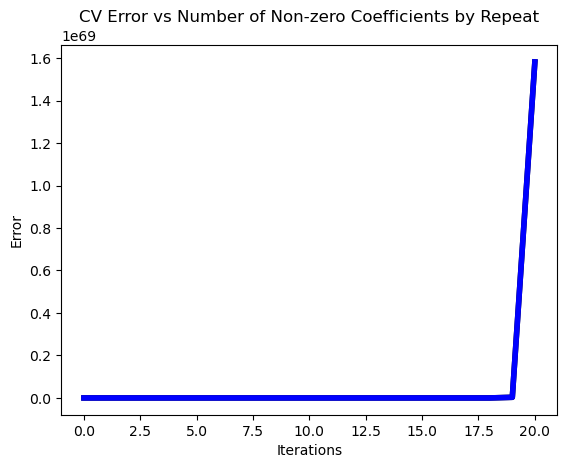

In [720]:
len(mses2[4:])
#plt.plot(gamma_avg['support_size'], gamma_avg['cv_error'], label=f"Mean, Gamma {gamma_val}", linewidth=4, color='black')
plt.plot(range(0,len(mses2[4:])),mses2[4:], linewidth=4, color='black')
plt.plot(range(0,len(losses[4:])),losses[4:], linewidth=4, color='blue')
plt.title("CV Error vs Number of Non-zero Coefficients by Repeat")
plt.xlabel("Iterations")
plt.ylabel("Error")
#len(arrrr)

Text(0, 0.5, 'Error')

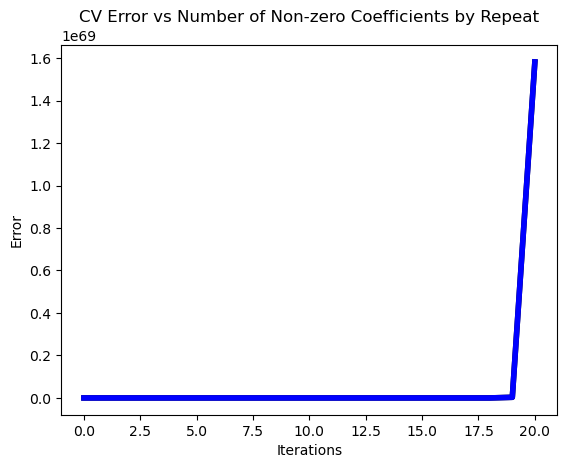

In [721]:
len(mses2[4:])
#plt.plot(gamma_avg['support_size'], gamma_avg['cv_error'], label=f"Mean, Gamma {gamma_val}", linewidth=4, color='black')
plt.plot(range(0,len(mses2[4:])),mses2[4:], linewidth=4, color='black')
plt.plot(range(0,len(losses[4:])),losses[4:], linewidth=4, color='blue')
plt.title("CV Error vs Number of Non-zero Coefficients by Repeat")
plt.xlabel("Iterations")
plt.ylabel("Error")
#plt.xscale('log')

Text(0, 0.5, 'Error')

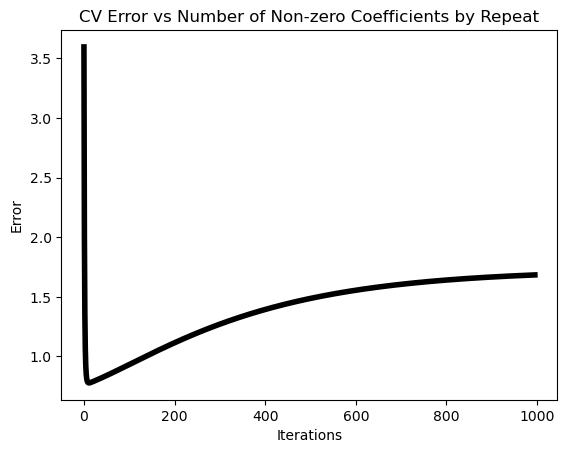

In [722]:
len(mses[4:])
#plt.plot(gamma_avg['support_size'], gamma_avg['cv_error'], label=f"Mean, Gamma {gamma_val}", linewidth=4, color='black')
plt.plot(range(0,len(mses[4:])),mses[4:], linewidth=4, color='black')
plt.title("CV Error vs Number of Non-zero Coefficients by Repeat")
plt.xlabel("Iterations")
plt.ylabel("Error")
#plt.xscale('log')

In [663]:
mses

[145.0,
 50.98960000000001,
 18.928790133333337,
 7.695821044049387,
 3.596368323555324,
 2.0130714989139635,
 1.3571206505640645,
 1.0640818051503538,
 0.9237953804519385,
 0.8529340635061882,
 0.8159078981877245,
 0.7963123317467542,
 0.7860587059421963,
 0.7809446827904925,
 0.7787057741086305,
 0.7780924600515816,
 0.7784050895774653,
 0.7792484341226522,
 0.7803980555122646,
 0.7817260960111994,
 0.7831595674396409,
 0.7846567384996695,
 0.7861937114992171,
 0.7877567729890462,
 0.7893380286101539,
 0.7909329100903455,
 0.7925387507952613,
 0.7941539716128407,
 0.795777615590932,
 0.7974090819049562,
 0.7990479737683711,
 0.80069401148126,
 0.8023469827183294,
 0.8040067141072585,
 0.80567305497912,
 0.8073458680779264,
 0.8090250242488368,
 0.8107103994010313,
 0.8124018727710081,
 0.8140993259293245,
 0.8158026422122837,
 0.8175117063965149,
 0.8192264045123359,
 0.8209466237364023,
 0.8226722523295811,
 0.8244031796006251,
 0.8261392958845071,
 0.8278804925290844,
 0.8296266618

In [742]:
X = filtered_genotype_df.drop(columns=['Q', 'B'])  # SNPs as features
y = filtered_genotype_df["Q"]  # binary target (0/1)
X_n = np.array(X)
y_n = np.array(y)

In [972]:
history_list = []
    # Parameters
penalty_values = [0.01, 0.05, 0.1, 0.25, 0.5]
learning_rate = 0.00001
max_iterations = 5000
tolerance = 1e-5
k_sparsity = 3000  # Keep 50 non-zero coefficients
normalize = True


    # Simulate wide dataset (replace with X_np, y_np)
np.random.seed(42)
#X_np = np.random.randn(3000, 10000)  # 3000 rows, 10000 columns
true_coeffs = np.zeros(10000)
true_coeffs[:10] = np.random.randn(10)  # Only 10 non-zero coefficients
#y_np = X_np @ true_coeffs + np.random.randn(3000) * 0.1

# Split into train/test (optional)
X_test = X_n[2000:, :]
y_test = y_n[2000:]
X_np = X_n[:2000, :]
y_np = y_n[:2000]
    
for penalty in penalty_values:
    coeffs, intercept, iters, final_loss, history = linear_regression_manual(
        X_np, y_np, 
        X_test=X_test, y_test=y_test,
        penalty=penalty, 
        learning_rate=learning_rate, 
        max_iterations=max_iterations, 
        tolerance=tolerance, 
        k_sparsity=k_sparsity,
        normalize=normalize)
    history_list.append(history)

Converged after 1585 iterations (loss change: 0.000006)
Reached maximum iterations (5000) with final loss: 2044.767095
Converged after 908 iterations (loss change: 0.000008)
Reached maximum iterations (5000) with final loss: 75784.054601
Converged after 724 iterations (loss change: 0.000009)


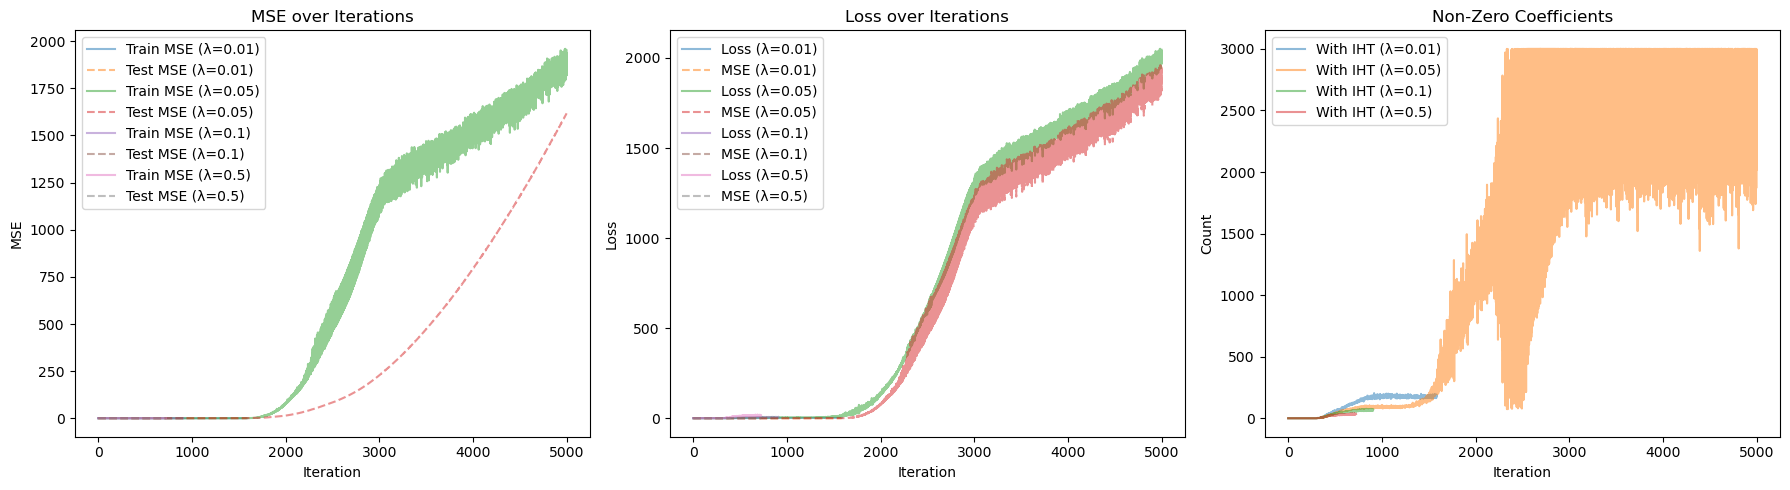

In [976]:
plt.figure(figsize=(18, 5))

# MSE Plot
plt.subplot(1, 3, 1)
for i, history in enumerate(history_list):
    if penalty_values[i] != 0.25:
        label_suffix = f" (λ={penalty_values[i]})"
        plt.plot(history['mses'], label='Train MSE' + label_suffix, alpha=0.5)
        if history['test_mses'][0] != 0:
            plt.plot(history['test_mses'], linestyle='--', label='Test MSE' + label_suffix, alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.legend()

# Loss Plot
plt.subplot(1, 3, 2)
for i, history in enumerate(history_list):
    if penalty_values[i] != 0.25:
        label_suffix = f" (λ={penalty_values[i]})"
        plt.plot(history['losses'], label='Loss' + label_suffix, alpha=0.5)
        plt.plot(history['mses'], linestyle='--', label='MSE' + label_suffix, alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()

# Non-zero Coefficients Plot
plt.subplot(1, 3, 3)
for i, history in enumerate(history_list):
    if penalty_values[i] != 0.25:
        label_suffix = f" (λ={penalty_values[i]})"
        plt.plot(history['non_zero_coefs'], label='With IHT' + label_suffix, alpha=0.5)
        plt.xlabel('Iteration')
plt.ylabel('Count')
plt.title('Non-Zero Coefficients')
plt.legend()

plt.tight_layout()
plt.show()


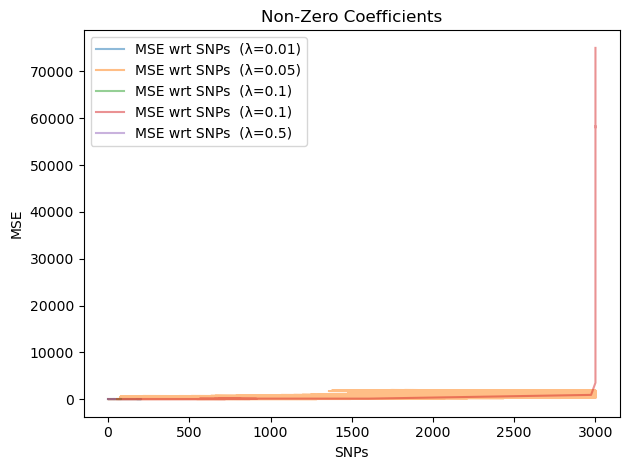

In [977]:
for i, history in enumerate(history_list):
    if penalty_values[i] != 0.25:
        label_suffix = f" (λ={penalty_values[i]})"
    plt.plot(history['non_zero_coefs'], history['mses'],label=f'MSE wrt SNPs {label_suffix}', alpha=0.5)
    plt.ylabel('MSE')
    plt.xlabel('SNPs')
    plt.title('Non-Zero Coefficients')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_manual(X, y, X_test=None, y_test=None, penalty=0.1, learning_rate=0.001, max_iterations=1000, tolerance=1e-4, k_sparsity=50, normalize=True):
    if normalize:
        X_mean = X.mean(axis=0)
        X_std = X.std(axis=0)
        X_std[X_std == 0] = 1  # Avoid division by zero
        #X = (X - X_mean) / X_std
        y_mean = y.mean()
        y_std = y.std() if y.std() != 0 else 1
        y = (y - y_mean) / y_std
        
        if X_test is not None and y_test is not None:
            X_test = (X_test - X_mean) / X_std
            y_test = (y_test - y_mean) / y_std
    
    # Add bias term
    X_bias = np.c_[np.ones(X.shape[0]), X]
    theta = np.zeros(X_bias.shape[1])
    m = len(y)
    
    # Prepare test data if provided
    test_available = X_test is not None and y_test is not None
    if test_available:
        X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
    
    # Initialize tracking
    prev_loss = float('inf')
    iterations_run = 0
    history = {'mses': [], 'test_mses': [], 'losses': [], 'non_zero_coefs': [], 'non_zero_coefs_2': []}
    for i in range(max_iterations):
        predictions = X_bias @ theta
        error = predictions - y
        
        mse = (1 / m) * np.sum(error ** 2)
        #non_zero_coefs = np.count_nonzero(theta[1:])
        coeffs = theta[1:]  # Exclude intercept
        non_zero_coefs = len(coeffs[abs(coeffs) > 0.001 ])
        l0_penalty = penalty * non_zero_coefs
        current_loss = mse + l0_penalty
        
        # Compute test MSE if available
        test_mse = None
        if test_available:
            test_predictions = X_test_bias @ theta
            test_mse = (1 / len(y_test)) * np.sum((test_predictions - y_test) ** 2)
        
        # Store history
        history['mses'].append(mse)
        history['test_mses'].append(test_mse if test_mse is not None else 0)
        history['losses'].append(current_loss)
        history['non_zero_coefs'].append(non_zero_coefs)
        
        # Stopping criteria
        loss_change = abs(prev_loss - current_loss)
        if loss_change < tolerance:
            print(f"Converged after {i+1} iterations (loss change: {loss_change:.6f})")
            break
        
        # Compute gradient (MSE term only)
        gradient = (2 / m) * X_bias.T @ error
        non_zero_mask = np.abs(theta[1:]) > 0.001
        non_zero_count = np.sum(non_zero_mask)
        scaled_penalty = penalty * non_zero_count
        
        gradient[1:][non_zero_mask] += scaled_penalty


        # Update coefficients
        theta -= learning_rate * gradient
        coeffs = theta[1:]  # Exclude intercept
        non_zer_coefs = len(coeffs[abs(coeffs) > 0.001 ])
        history['non_zero_coefs_2'].append(non_zer_coefs)
        # Apply hard thresholding to enforce k-sparsity (exclude intercept)
        if k_sparsity < X.shape[1]:
            abs_coeffs = np.abs(theta[1:])
            threshold = np.sort(abs_coeffs)[-k_sparsity] if k_sparsity > 0 else 0
            theta[1:][abs_coeffs < threshold] = 0
        
        prev_loss = current_loss
        iterations_run = i + 1
    
    if iterations_run == max_iterations:
        print(f"Reached maximum iterations ({max_iterations}) with final loss: {current_loss:.6f}")
    
    # Adjust coefficients for normalization
    intercept = theta[0]
    coefficients = theta[1:]
    if normalize:
        coefficients = coefficients / X_std
        intercept = intercept * y_std + y_mean - np.sum(coefficients * X_mean)
    
    return coefficients, intercept, iterations_run, current_loss, history

# Example usage
if __name__ == "__main__":
    # Simulate wide dataset (replace with X_np, y_np)
    np.random.seed(42)
    #X_np = np.random.randn(3000, 10000)  # 3000 rows, 10000 columns
    true_coeffs = np.zeros(10000)
    true_coeffs[:10] = np.random.randn(10)  # Only 10 non-zero coefficients
    #y_np = X_np @ true_coeffs + np.random.randn(3000) * 0.1
    
    # Split into train/test (optional)
    X_test = X_n[2000:, :]
    y_test = y_n[2000:]
    X_np = X_n[:2000, :]
    y_np = y_n[:2000]
    
    # Parameters
    penalty = 0.1  # Lower penalty for balance
    learning_rate = 0.00001
    max_iterations = 5000
    tolerance = 1e-5
    k_sparsity = 3000  # Keep 50 non-zero coefficients
    normalize = True
    
    coeffs, intercept, iters, final_loss, history = linear_regression_manual(
        X_np, y_np, 
        X_test=X_test, y_test=y_test,
        penalty=penalty, 
        learning_rate=learning_rate, 
        max_iterations=max_iterations, 
        tolerance=tolerance, 
        k_sparsity=k_sparsity,
        normalize=normalize)

Intercept: 68.40672607184564
Coefficients (first 10): [ 0.          0.00168202  0.          0.         -0.03268818  0.00146759
  0.          0.          0.00107343  0.        ]
Non-zero coefficients: 3000
Iterations run: 907
Final loss: 7.686168682947543
Final train MSE: 0.686168682947543
Final test MSE: 0.7674848579290094


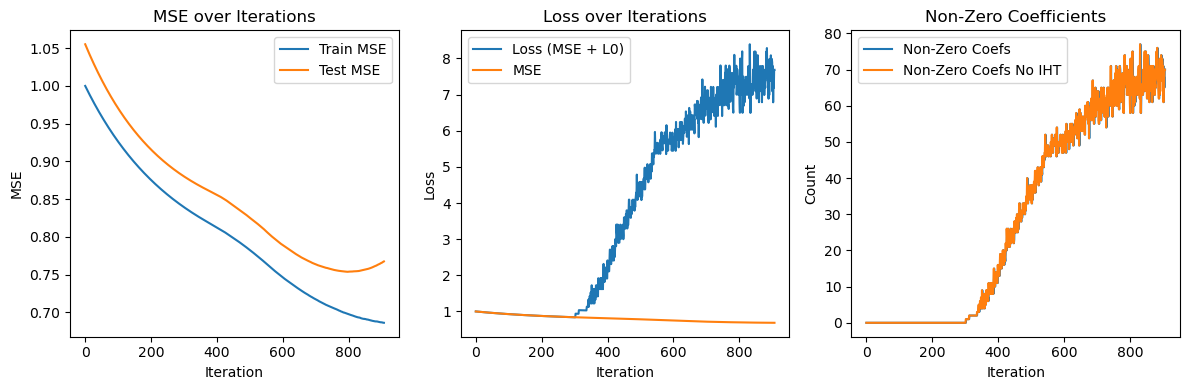

In [954]:
print("Intercept:", intercept)
print("Coefficients (first 10):", coeffs[:10])
print("Non-zero coefficients:", np.count_nonzero(coeffs))
print("Iterations run:", iters)
print("Final loss:", final_loss)
print("Final train MSE:", history['mses'][-1])
print("Final test MSE:", history['test_mses'][-1] if history['test_mses'][-1] != 0 else "N/A")

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history['mses'], label='Train MSE')
if history['test_mses'][0] != 0:
    plt.plot(history['test_mses'], label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history['losses'], label='Loss (MSE + L0)')
plt.plot(history['mses'], label='MSE')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history['non_zero_coefs'], label='Non-Zero Coefs')
plt.plot(history['non_zero_coefs_2'], label='Non-Zero Coefs No IHT')
plt.xlabel('Iteration')
plt.ylabel('Count')
plt.title('Non-Zero Coefficients')
plt.legend()

plt.tight_layout()
plt.show()

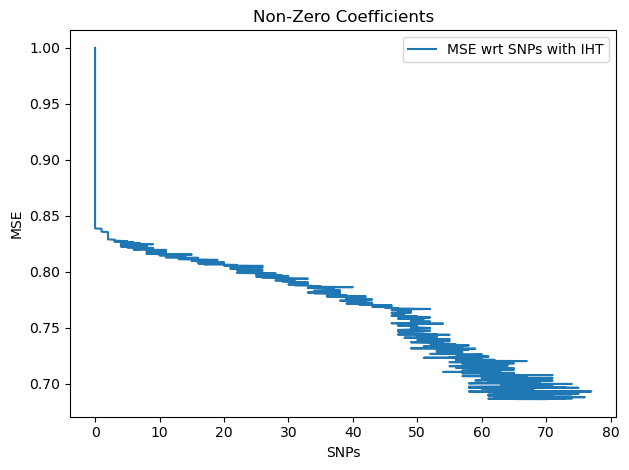

In [955]:
#plt.plot(, label='Train MSE')
plt.plot(history['non_zero_coefs'], history['mses'],label='MSE wrt SNPs with IHT')
plt.ylabel('MSE')
plt.xlabel('SNPs')
plt.title('Non-Zero Coefficients')
plt.legend()

plt.tight_layout()
plt.show()

In [962]:
coeffs.shape
selected_snps = np.flatnonzero(np.abs(coeffs) > 1e-6)
selected_coeffs = coeffs[selected_snps]

# Sort by magnitude
sorted_indices = np.argsort(-np.abs(selected_coeffs))
sorted_snps = selected_snps[sorted_indices]
sorted_coeffs = selected_coeffs[sorted_indices]

# Get column names
sorted_column_names = X.columns[sorted_snps]

# Print
print("Selected SNPs (sorted by |coefficient|):")
for name, coeff in zip(sorted_column_names, sorted_coeffs):
    print(f"SNP: {name}, Coefficient: {coeff}")


Selected SNPs (sorted by |coefficient|):
SNP: chr_1_pos_49825082, Coefficient: -0.049765598540926846
SNP: chr_1_pos_50009335, Coefficient: -0.04490432688698085
SNP: chr_1_pos_57518347, Coefficient: -0.04476478904628318
SNP: chr_1_pos_49784539, Coefficient: -0.04442916295591596
SNP: chr_1_pos_55778704, Coefficient: -0.04349059049588188
SNP: chr_3_pos_71610807, Coefficient: -0.04212043324497294
SNP: chr_1_pos_58539161, Coefficient: -0.041029035190406064
SNP: chr_3_pos_10141433, Coefficient: -0.040629595799215414
SNP: chr_3_pos_71399052, Coefficient: -0.040593460819929185
SNP: chr_3_pos_72354697, Coefficient: -0.04047886235744624
SNP: chr_1_pos_53579087, Coefficient: -0.0401326618741806
SNP: chr_3_pos_85030099, Coefficient: -0.04010662529538348
SNP: chr_3_pos_68164085, Coefficient: -0.04007826586393287
SNP: chr_1_pos_57125254, Coefficient: -0.03995075655994087
SNP: chr_1_pos_44071672, Coefficient: -0.03989995899511059
SNP: chr_3_pos_72543915, Coefficient: -0.03978906493173386
SNP: chr_1_p

Running with penalty: 0.01
Converged after 8204 iterations (loss change: 0.000006)
Running with penalty: 0.05
Converged after 9330 iterations (loss change: 0.000009)
Running with penalty: 0.1
Converged after 7991 iterations (loss change: 0.000004)
Running with penalty: 0.25
Reached maximum iterations (10000) with final loss: 5197.515101
Running with penalty: 0.5
Reached maximum iterations (10000) with final loss: 20629.277647
Intercept: 529.0650737485521
Coefficients (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Non-zero coefficients: 84
Iterations run: 10000
Final loss: 20629.27764678428
Final train MSE: 20587.27764678428
Final test MSE: 19871.125533596056


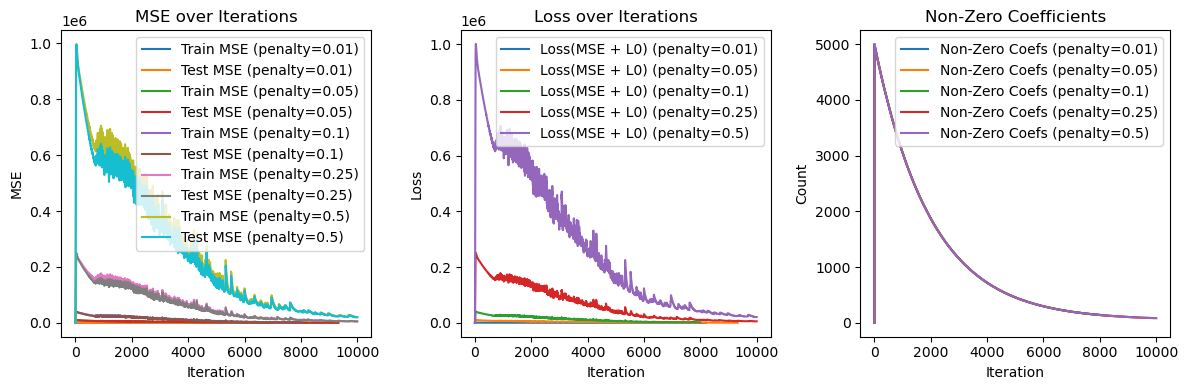

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, issparse

def linear_regression_manual(X, y, X_test=None, y_test=None, penalty=0.01, learning_rate=0.01, max_iterations=1000, tolerance=1e-4, k_initial=5000, k_final=50, normalize_y=True, scale_x=2.0, max_val=1e5):
    
    # Convert X to sparse matrix if not already (optional for ordinal)
    if not issparse(X):
        X = csr_matrix(X)
    if X_test is not None and not issparse(X_test):
        X_test = csr_matrix(X_test)
    
    # Scale X minimally
    X_scaled = X / scale_x if scale_x != 1.0 else X
    if X_test is not None:
        X_test_scaled = X_test / scale_x if scale_x != 1.0 else X_test
    
    # Normalize y
    if normalize_y:
        y_mean = y.mean()
        y_std = y.std() if y.std() != 0 else 1
        y_scaled = (y - y_mean) / y_std
        if y_test is not None:
            y_test_scaled = (y_test - y_mean) / y_std
    else:
        y_scaled = y
        y_mean = 0
        y_std = 1
        y_test_scaled = y_test if y_test is not None else None
    
    # Add bias term
    ones = np.ones((X.shape[0], 1))
    X_bias = csr_matrix(np.hstack([ones, X_scaled.toarray()]))  # Dense for bias
    if X_test is not None:
        X_test_bias = csr_matrix(np.hstack([np.ones((X_test.shape[0], 1)), X_test_scaled.toarray()]))
    
    theta = np.zeros(X_bias.shape[1])
    m = len(y)
    
    # Test data setup
    test_available = X_test is not None and y_test is not None
    
    # Initialize tracking
    prev_loss = float('inf')
    iterations_run = 0
    history = {'mses': [], 'test_mses': [], 'losses': [], 'non_zero_coefs': []}
    
    for i in range(max_iterations):
        # Compute dynamic k_sparsity (exponential decay for smoother transition)
        k_sparsity = int(k_final + (k_initial - k_final) * np.exp(-5 * i / max_iterations))
        
        # Compute predictions and clip
        predictions = X_bias @ theta
        predictions = np.clip(predictions, -max_val, max_val)
        error = predictions - y_scaled
        error = np.clip(error, -max_val, max_val)
        
        # Compute MSE and L0 loss
        mse = (1 / m) * np.sum(error ** 2)
        if np.isnan(mse) or np.isinf(mse):
            print(f"Stopping at iteration {i+1}: MSE is NaN or inf")
            break
        non_zero_coefs = np.count_nonzero(theta[1:])
        l0_penalty = penalty * non_zero_coefs
        current_loss = mse + l0_penalty
        
        # Compute test MSE
        test_mse = None
        if test_available:
            test_predictions = X_test_bias @ theta
            test_predictions = np.clip(test_predictions, -max_val, max_val)
            test_mse = (1 / len(y_test)) * np.sum((test_predictions - y_test_scaled) ** 2)
            if np.isnan(test_mse) or np.isinf(test_mse):
                test_mse = None
        
        # Store history
        history['mses'].append(mse)
        history['test_mses'].append(test_mse if test_mse is not None else 0)
        history['losses'].append(current_loss)
        history['non_zero_coefs'].append(non_zero_coefs)
        
        # Stopping criteria
        if np.isnan(current_loss) or np.isinf(current_loss):
            print(f"Stopping at iteration {i+1}: Loss is NaN or inf")
            break
        loss_change = abs(prev_loss - current_loss) if not np.isnan(prev_loss) else float('inf')
        if loss_change < tolerance:
            print(f"Converged after {i+1} iterations (loss change: {loss_change:.6f})")
            break
        
        # Compute gradient and clip
        gradient = (2 / m) * X_bias.T @ error
        non_zero_mask = np.abs(theta[1:]) > 0
        non_zero_count = np.sum(non_zero_mask)
        scaled_penalty = penalty * non_zero_count
        
        gradient[1:][non_zero_mask] += scaled_penalty
        
        # Update coefficients
        theta -= learning_rate * gradient
        
        # Apply hard thresholding
        if k_sparsity < X.shape[1]:
            abs_coeffs = np.abs(theta[1:])
            threshold = np.sort(abs_coeffs)[-k_sparsity] if k_sparsity > 0 else 0
            theta[1:][abs_coeffs < threshold] = 0
        
        prev_loss = current_loss
        iterations_run = i + 1
    
    if iterations_run == max_iterations:
        print(f"Reached maximum iterations ({max_iterations}) with final loss: {current_loss:.6f}")
    
    # Adjust for scaling
    intercept = theta[0]
    coefficients = theta[1:]
    if normalize_y or scale_x != 1.0:
        coefficients = coefficients * y_std * scale_x
        intercept = intercept * y_std + y_mean
    
    return coefficients, intercept, iterations_run, current_loss, history

# Example usage
if __name__ == "__main__":
    true_coeffs = np.zeros(10000)
    true_coeffs[:10] = np.random.randn(10)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)
    
    penalty = 0.01
    penalty_values = [0.01, 0.05, 0.1, 0.25, 0.5]
    learning_rate = 0.00001
    max_iterations = 10000
    tolerance = 1e-5
    k_initial = 5000
    k_final = 50
    normalize_y = True  # Critical for stability
    scale_x = 1.0  # Divide 0/1/2 by 2
    max_val = 1e5
    coeffs_arr = []
    intercep_arr = []
    iter_arr = []
    final_los_arr = []
    histor_arr = []
    for penalty in penalty_values:
        print(f"Running with penalty: {penalty}")
        coeffs, intercept, iters, final_loss, history = linear_regression_manual(
            X_train, y_train, 
            X_test=X_test, y_test=y_test,
            penalty=penalty, 
            learning_rate=learning_rate, 
            max_iterations=max_iterations, 
            tolerance=tolerance,
            k_initial=k_initial,
            k_final=k_final,
            normalize_y=normalize_y,
            scale_x=scale_x,
            max_val=max_val
        )
        coeffs_arr.append(coeffs)
        intercep_arr.append(intercept)
        iter_arr.append(iters)
        final_los_arr.append(final_loss)
        histor_arr.append(history)
    
    print("Intercept:", intercept)
    print("Coefficients (first 10):", coeffs[:10])
    print("Non-zero coefficients:", np.count_nonzero(coeffs))
    print("Iterations run:", iters)
    print("Final loss:", final_loss)
    print("Final train MSE:", history['mses'][-1])
    print("Final test MSE:", history['test_mses'][-1] if history['test_mses'][-1] != 0 else "N/A")
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    for penalty, history in zip(penalty_values, histor_arr):
        plt.plot(history['mses'], label=f'Train MSE (penalty={penalty})')
        if history['test_mses'][0] != 0:
            plt.plot(history['test_mses'], label=f'Test MSE (penalty={penalty})')
    #plt.plot(history['mses'], label='Train MSE')
    #if history['test_mses'][0] != 0:
    #    plt.plot(history['test_mses'], label='Test MSE')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('MSE over Iterations')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    for penalty, history in zip(penalty_values, histor_arr):
        plt.plot(history['losses'], label=f'Loss(MSE + L0) (penalty={penalty})')
#    plt.plot(history['losses'], label='Loss (MSE + L0)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss over Iterations')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    for penalty, history in zip(penalty_values, histor_arr):
        plt.plot(history['non_zero_coefs'], label=f'Non-Zero Coefs (penalty={penalty})')
#    plt.plot(history['non_zero_coefs'], label='Non-Zero Coefs')
    plt.xlabel('Iteration')
    plt.ylabel('Count')
    plt.title('Non-Zero Coefficients')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

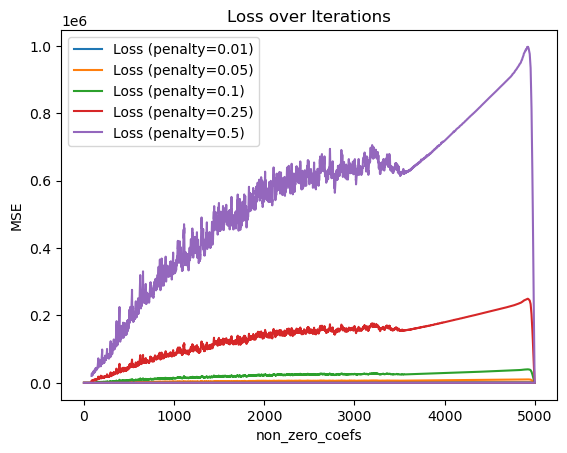

In [965]:
for penalty, history in zip(penalty_values, histor_arr):
    plt.plot(history['non_zero_coefs'], history['mses'], label=f'Loss (penalty={penalty})')
plt.xlabel('non_zero_coefs')
plt.ylabel('MSE')
plt.title('Loss over Iterations')
plt.legend()


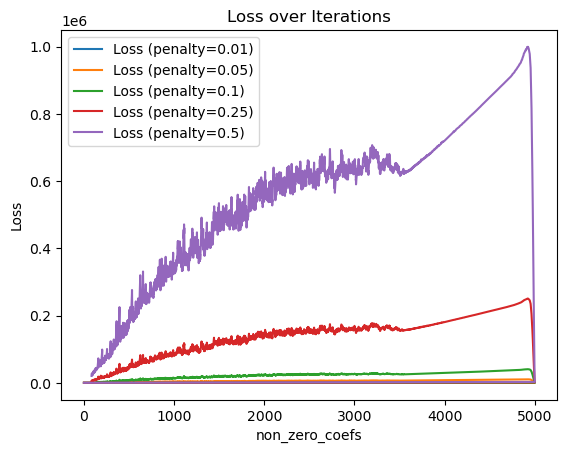

In [966]:
for penalty, history in zip(penalty_values, histor_arr):
    plt.plot(history['non_zero_coefs'], history['losses'], label=f'Loss (penalty={penalty})')
plt.xlabel('non_zero_coefs')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()


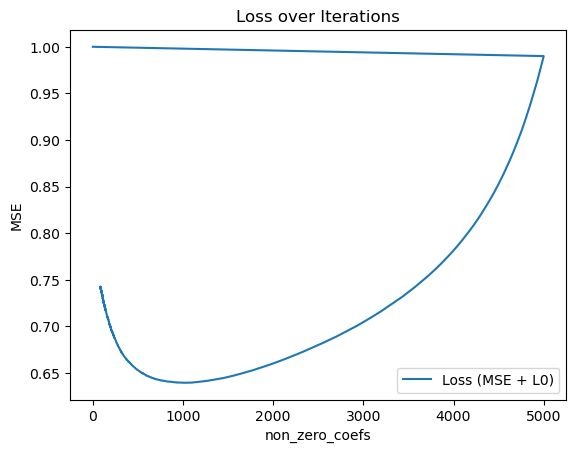

In [ ]:

plt.plot(history['non_zero_coefs'], history['mses'], label='Loss (MSE + L0)')
plt.xlabel('non_zero_coefs')
plt.ylabel('MSE')
plt.title('Loss over Iterations')
plt.legend()


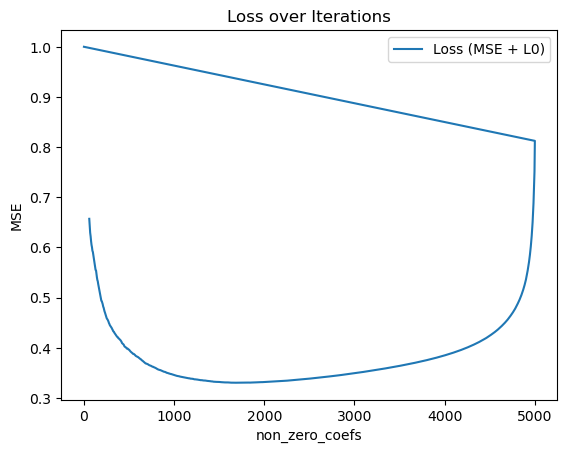

In [760]:

plt.plot(history['non_zero_coefs'], history['mses'], label='Loss (MSE + L0)')
plt.xlabel('non_zero_coefs')
plt.ylabel('MSE')
plt.title('Loss over Iterations')
plt.legend()


In [ ]:
penalty = 0.3
learning_rate = 0.001
max_iterations = 1000
tolerance = 1e-4
k_initial = 5000  # Start with many non-zero coefficients
k_final = 50      # End with few
normalize = True

coeffs2, intercept2, iters2, final_loss2, history2 = linear_regression_manual(
    X_train, y_train, 
    X_test=X_test, y_test=y_test,
    penalty=penalty, 
    learning_rate=learning_rate, 
    max_iterations=max_iterations, 
    tolerance=tolerance,
    k_initial=k_initial,
    k_final=k_final,
    normalize=normalize
)

### WITHOUT IHT

This trial excludes Iterative Hard Thresholding (IHT) to examine its influence on model selection and accuracy.

Running with penalty: 0.01
Converged after 1447 iterations (loss change: 0.000001)
Running with penalty: 0.05
Converged after 965 iterations (loss change: 0.000004)
Running with penalty: 0.1
Reached maximum iterations (10000) with final loss: 23226.341384
Running with penalty: 0.25
Reached maximum iterations (10000) with final loss: 142402.498676
Running with penalty: 0.5
Reached maximum iterations (10000) with final loss: 1139205.506016
Intercept: 923.9794146776314
Coefficients (first 10): [-148.34676523   24.3313747     0.            0.            0.
    0.            0.            0.         -102.49379971    0.        ]
Non-zero coefficients: 3000
Iterations run: 10000
Final loss: 1139205.506015963
Final train MSE: 1137705.506015963
Final test MSE: 1196839.354992286


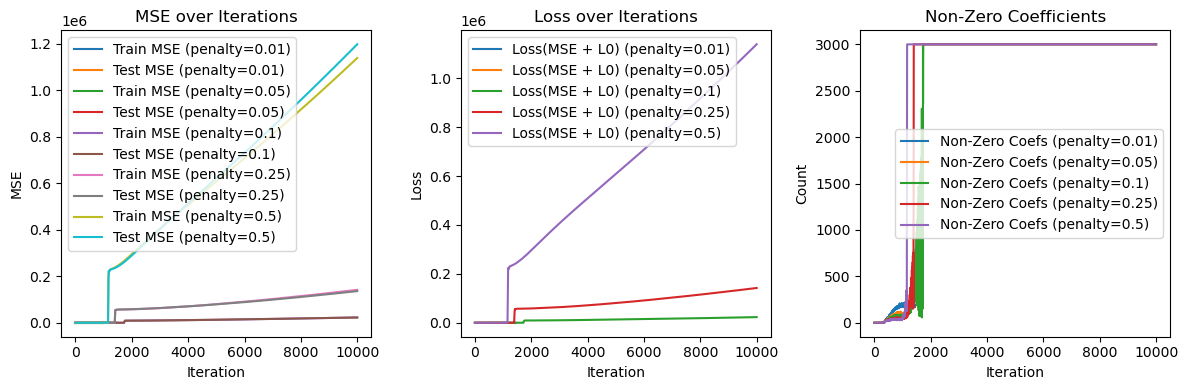

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, issparse

def linear_regression_manual(X, y, X_test=None, y_test=None, penalty=0.01, learning_rate=0.01, max_iterations=1000, tolerance=1e-4, k_initial=5000, k_final=50, normalize_y=True, scale_x=2.0, max_val=1e5):
    if not issparse(X):
        X = csr_matrix(X)
    if X_test is not None and not issparse(X_test):
        X_test = csr_matrix(X_test)
    
    # Scale X minimally
    X_scaled = X / scale_x if scale_x != 1.0 else X
    if X_test is not None:
        X_test_scaled = X_test / scale_x if scale_x != 1.0 else X_test
    
    # Normalize y
    if normalize_y:
        y_mean = y.mean()
        y_std = y.std() if y.std() != 0 else 1
        y_scaled = (y - y_mean) / y_std
        if y_test is not None:
            y_test_scaled = (y_test - y_mean) / y_std
    else:
        y_scaled = y
        y_mean = 0
        y_std = 1
        y_test_scaled = y_test if y_test is not None else None
    
    # Add bias term
    ones = np.ones((X.shape[0], 1))
    X_bias = csr_matrix(np.hstack([ones, X_scaled.toarray()]))  # Dense for bias
    if X_test is not None:
        X_test_bias = csr_matrix(np.hstack([np.ones((X_test.shape[0], 1)), X_test_scaled.toarray()]))
    
    theta = np.zeros(X_bias.shape[1])
    m = len(y)
    
    # Test data setup
    test_available = X_test is not None and y_test is not None
    
    # Initialize tracking
    prev_loss = float('inf')
    iterations_run = 0
    history = {'mses': [], 'test_mses': [], 'losses': [], 'non_zero_coefs': []}
    
    for i in range(max_iterations):
        # Compute dynamic k_sparsity (exponential decay for smoother transition)
        #k_sparsity = int(k_final + (k_initial - k_final) * np.exp(-5 * i / max_iterations))
        k_sparsity = 3000
        
        # Compute predictions and clip
        predictions = X_bias @ theta
        predictions = np.clip(predictions, -max_val, max_val)
        error = predictions - y_scaled
        error = np.clip(error, -max_val, max_val)
        
        # Compute MSE and L0 loss
        mse = (1 / m) * np.sum(error ** 2)
        if np.isnan(mse) or np.isinf(mse):
            print(f"Stopping at iteration {i+1}: MSE is NaN or inf")
            break
        #non_zero_coefs = np.count_nonzero(theta[1:])
        coeffs = theta[1:]  # Exclude intercept
        non_zero_coefs = len(coeffs[abs(coeffs) > 0.001 ])

        l0_penalty = penalty * non_zero_coefs
        current_loss = mse + l0_penalty
        
        # Compute test MSE
        test_mse = None
        if test_available:
            test_predictions = X_test_bias @ theta
            test_predictions = np.clip(test_predictions, -max_val, max_val)
            test_mse = (1 / len(y_test)) * np.sum((test_predictions - y_test_scaled) ** 2)
            if np.isnan(test_mse) or np.isinf(test_mse):
                test_mse = None
        
        # Store history
        history['mses'].append(mse)
        history['test_mses'].append(test_mse if test_mse is not None else 0)
        history['losses'].append(current_loss)
        history['non_zero_coefs'].append(non_zero_coefs)
        
        # Stopping criteria
        if np.isnan(current_loss) or np.isinf(current_loss):
            print(f"Stopping at iteration {i+1}: Loss is NaN or inf")
            break
        loss_change = abs(prev_loss - current_loss) if not np.isnan(prev_loss) else float('inf')
        if loss_change < tolerance:
            print(f"Converged after {i+1} iterations (loss change: {loss_change:.6f})")
            break
        
        # Compute gradient and clip
        gradient = (2 / m) * X_bias.T @ error
        non_zero_mask = np.abs(theta[1:]) > 0.001
        non_zero_count = np.sum(non_zero_mask)
        scaled_penalty = penalty * non_zero_count

        gradient[1:][non_zero_mask] += scaled_penalty
        
        
        # Update coefficients
        theta -= learning_rate * gradient
        
        # Apply hard thresholding
        if k_sparsity < X.shape[1]:
            abs_coeffs = np.abs(theta[1:])
            threshold = np.sort(abs_coeffs)[-k_sparsity] if k_sparsity > 0 else 0
            theta[1:][abs_coeffs < threshold] = 0
        
        prev_loss = current_loss
        iterations_run = i + 1
    
    if iterations_run == max_iterations:
        print(f"Reached maximum iterations ({max_iterations}) with final loss: {current_loss:.6f}")
    
    # Adjust for scaling
    intercept = theta[0]
    coefficients = theta[1:]
    if normalize_y or scale_x != 1.0:
        coefficients = coefficients * y_std * scale_x
        intercept = intercept * y_std + y_mean
    
    return coefficients, intercept, iterations_run, current_loss, history

# Example usage
if __name__ == "__main__":
    # Simulate ordinal dataset (replace with X_np, y_np)
    np.random.seed(42)
    #X_np = np.random.choice([0, 1, 2], size=(3000, 10000))  # Ordinal 0/1/2
    true_coeffs = np.zeros(10000)
    true_coeffs[:10] = np.random.randn(10)
    #y_np = X_np @ true_coeffs + np.random.randn(3000) * 0.1
    
    # Split into train/test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)
    
    # Parameters

    penalty = 0.01
    penalty_values = [0.01, 0.05, 0.1, 0.25, 0.5]
    learning_rate = 0.00001
    max_iterations = 10000
    tolerance = 1e-5
    k_initial = 5000
    k_final = 50
    normalize_y = True  # Critical for stability
    scale_x = 1.0  # Divide 0/1/2 by 2
    max_val = 1e5
    coeffs_arr = []
    intercep_arr = []
    iter_arr = []
    final_los_arr = []
    histor_arr = []
    for penalty in penalty_values:
        print(f"Running with penalty: {penalty}")
        coeffs, intercept, iters, final_loss, history = linear_regression_manual(
            X_train, y_train, 
            X_test=X_test, y_test=y_test,
            penalty=penalty, 
            learning_rate=learning_rate, 
            max_iterations=max_iterations, 
            tolerance=tolerance,
            k_initial=k_initial,
            k_final=k_final,
            normalize_y=normalize_y,
            scale_x=scale_x,
            max_val=max_val
        )
        coeffs_arr.append(coeffs)
        intercep_arr.append(intercept)
        iter_arr.append(iters)
        final_los_arr.append(final_loss)
        histor_arr.append(history)
    
    print("Intercept:", intercept)
    print("Coefficients (first 10):", coeffs[:10])
    print("Non-zero coefficients:", np.count_nonzero(coeffs))
    print("Iterations run:", iters)
    print("Final loss:", final_loss)
    print("Final train MSE:", history['mses'][-1])
    print("Final test MSE:", history['test_mses'][-1] if history['test_mses'][-1] != 0 else "N/A")
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    for penalty, history in zip(penalty_values, histor_arr):
        plt.plot(history['mses'], label=f'Train MSE (penalty={penalty})')
        if history['test_mses'][0] != 0:
            plt.plot(history['test_mses'], label=f'Test MSE (penalty={penalty})')
    #plt.plot(history['mses'], label='Train MSE')
    #if history['test_mses'][0] != 0:
    #    plt.plot(history['test_mses'], label='Test MSE')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('MSE over Iterations')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    for penalty, history in zip(penalty_values, histor_arr):
        plt.plot(history['losses'], label=f'Loss(MSE + L0) (penalty={penalty})')
#    plt.plot(history['losses'], label='Loss (MSE + L0)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss over Iterations')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    for penalty, history in zip(penalty_values, histor_arr):
        plt.plot(history['non_zero_coefs'], label=f'Non-Zero Coefs (penalty={penalty})')
#    plt.plot(history['non_zero_coefs'], label='Non-Zero Coefs')
    plt.xlabel('Iteration')
    plt.ylabel('Count')
    plt.title('Non-Zero Coefficients')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

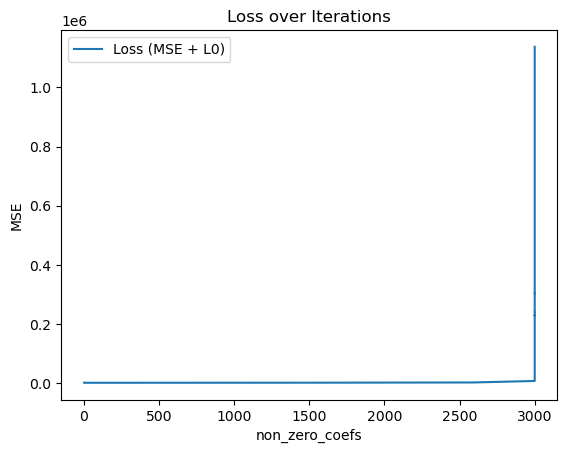

In [969]:
plt.plot(history['non_zero_coefs'], history['mses'], label='Loss (MSE + L0)')
plt.xlabel('non_zero_coefs')
plt.ylabel('MSE')
plt.title('Loss over Iterations')
plt.legend()

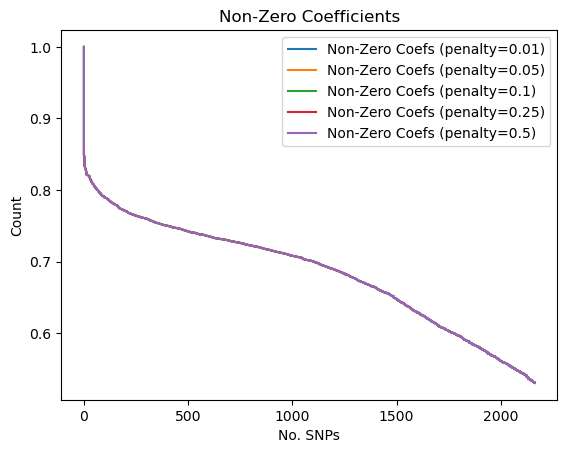

In [929]:


for penalty, history in zip(penalty_values, histor_arr):
    plt.plot(history['non_zero_coefs'], history['mses'], label=f'Non-Zero Coefs (penalty={penalty})')
#   plt.plot(history['non_zero_coefs'], label='Non-Zero Coefs')
plt.xlabel('No. SNPs')
plt.ylabel('Count')
plt.title('Non-Zero Coefficients')
plt.legend()


Running k_sparsity=50, penalty=0.01
Converged after 3612 iterations (loss change: 0.000010)
Running k_sparsity=50, penalty=0.1
Converged after 3612 iterations (loss change: 0.000010)
Running k_sparsity=50, penalty=0.5
Converged after 3612 iterations (loss change: 0.000010)
Running k_sparsity=100, penalty=0.01
Converged after 3495 iterations (loss change: 0.000010)
Running k_sparsity=100, penalty=0.1
Converged after 3495 iterations (loss change: 0.000010)
Running k_sparsity=100, penalty=0.5
Converged after 3495 iterations (loss change: 0.000010)
Running k_sparsity=500, penalty=0.01
Reached maximum iterations (5000) with final loss: 5.556112
Running k_sparsity=500, penalty=0.1
Reached maximum iterations (5000) with final loss: 50.556112
Running k_sparsity=500, penalty=0.5
Reached maximum iterations (5000) with final loss: 250.556112
Running k_sparsity=1000, penalty=0.01
Reached maximum iterations (5000) with final loss: 10.509354
Running k_sparsity=1000, penalty=0.1
Reached maximum itera

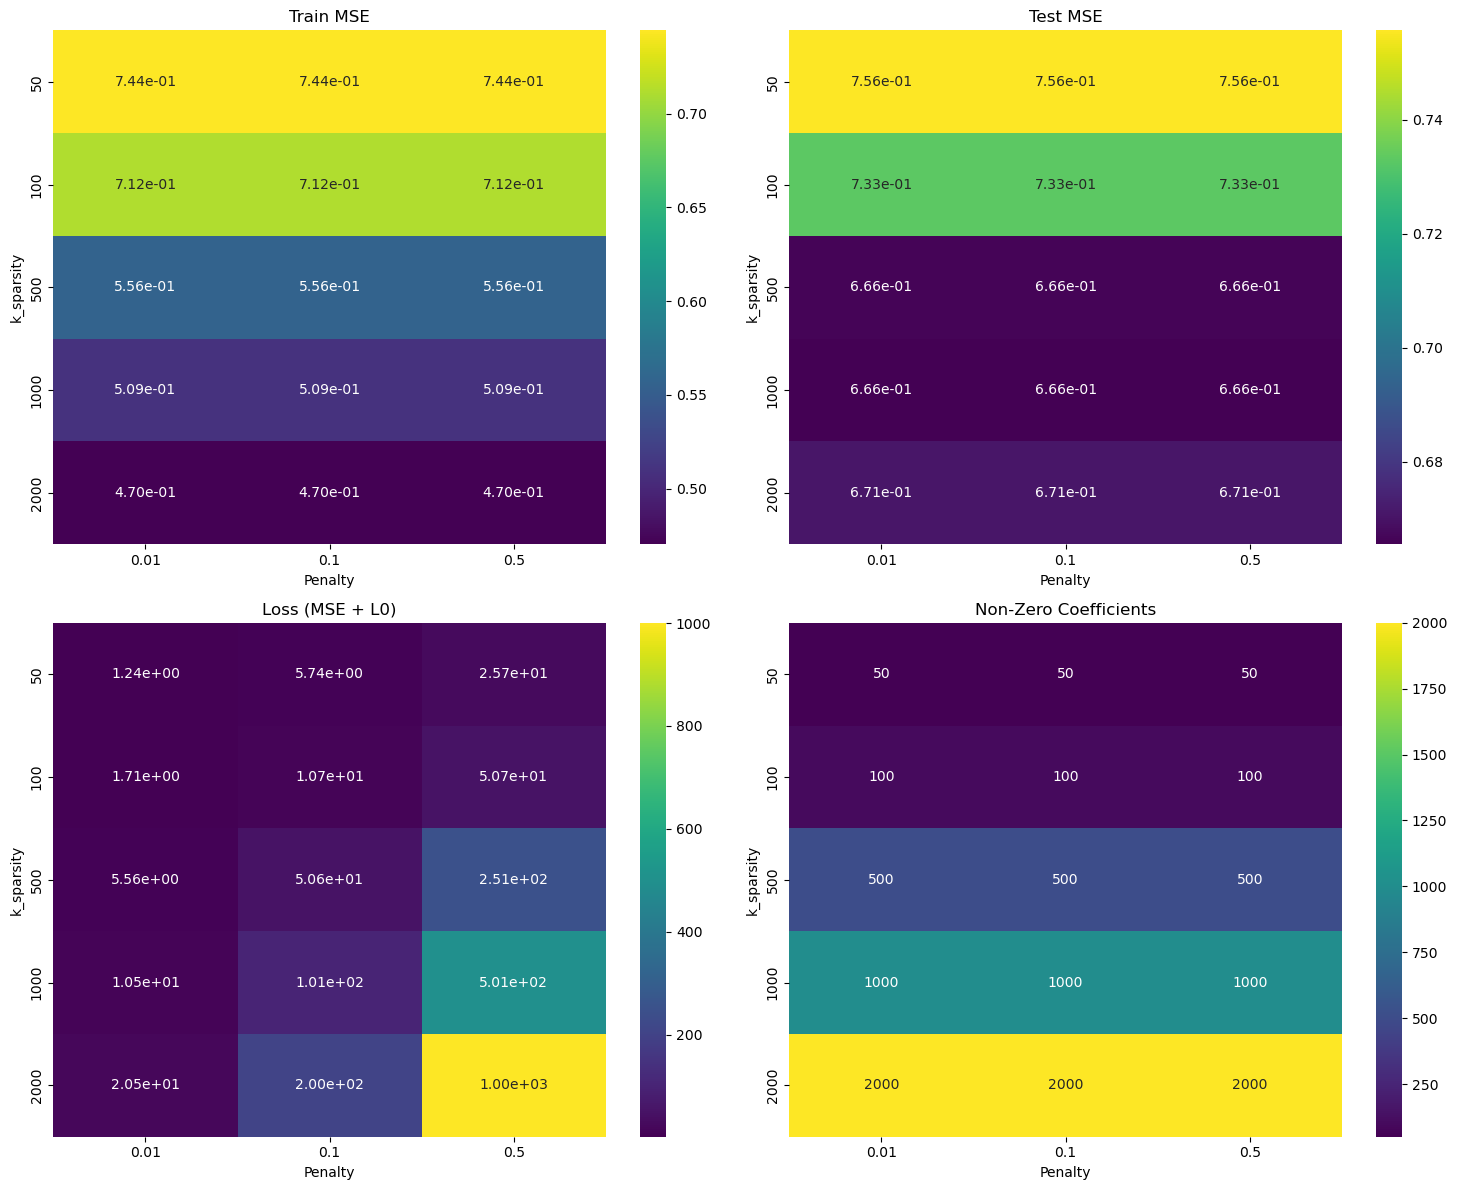

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, issparse
import seaborn as sns

def linear_regression_manual(X, y, X_test=None, y_test=None, penalty=0.01, learning_rate=1e-5, max_iterations=10000, tolerance=1e-5, k_sparsity=50, normalize_y=True, scale_x=1.0, max_val=1e5):
    # Convert X to sparse matrix if not already
    if not issparse(X):
        X = csr_matrix(X)
    if X_test is not None and not issparse(X_test):
        X_test = csr_matrix(X_test)
    
    # Scale X
    X_scaled = X / scale_x if scale_x != 1.0 else X
    if X_test is not None:
        X_test_scaled = X_test / scale_x if scale_x != 1.0 else X_test
    
    # Normalize y
    if normalize_y:
        y_mean = y.mean()
        y_std = y.std() if y.std() != 0 else 1
        y_scaled = (y - y_mean) / y_std
        if y_test is not None:
            y_test_scaled = (y_test - y_mean) / y_std
    else:
        y_scaled = y
        y_mean = 0
        y_std = 1
        y_test_scaled = y_test if y_test is not None else None
    
    # Add bias term
    ones = np.ones((X.shape[0], 1))
    X_bias = csr_matrix(np.hstack([ones, X_scaled.toarray()]))
    if X_test is not None:
        X_test_bias = csr_matrix(np.hstack([np.ones((X_test.shape[0], 1)), X_test_scaled.toarray()]))
    
    theta = np.zeros(X_bias.shape[1])
    m = len(y)
    
    # Test data setup
    test_available = X_test is not None and y_test is not None
    
    # Initialize tracking
    prev_loss = float('inf')
    iterations_run = 0
    history = {'mses': [], 'test_mses': [], 'losses': [], 'non_zero_coefs': []}
    
    for i in range(max_iterations):
        # Compute predictions and clip
        predictions = X_bias @ theta
        predictions = np.clip(predictions, -max_val, max_val)
        error = predictions - y_scaled
        error = np.clip(error, -max_val, max_val)
        
        # Compute MSE and L0 loss
        mse = (1 / m) * np.sum(error ** 2)
        if np.isnan(mse) or np.isinf(mse):
            print(f"Stopping at iteration {i+1}: MSE is NaN or inf")
            break
        non_zero_coefs = np.count_nonzero(theta[1:])
        l0_penalty = penalty * non_zero_coefs
        current_loss = mse + l0_penalty
        
        # Compute test MSE
        test_mse = None
        if test_available:
            test_predictions = X_test_bias @ theta
            test_predictions = np.clip(test_predictions, -max_val, max_val)
            test_mse = (1 / len(y_test)) * np.sum((test_predictions - y_test_scaled) ** 2)
            if np.isnan(test_mse) or np.isinf(test_mse):
                test_mse = None
        
        # Store history
        history['mses'].append(mse)
        history['test_mses'].append(test_mse if test_mse is not None else 0)
        history['losses'].append(current_loss)
        history['non_zero_coefs'].append(non_zero_coefs)
        
        # Stopping criteria
        if np.isnan(current_loss) or np.isinf(current_loss):
            print(f"Stopping at iteration {i+1}: Loss is NaN or inf")
            break
        loss_change = abs(prev_loss - current_loss) if not np.isnan(prev_loss) else float('inf')
        if loss_change < tolerance:
            print(f"Converged after {i+1} iterations (loss change: {loss_change:.6f})")
            break
        
        # Compute gradient and clip
        gradient = (2 / m) * X_bias.T @ error
        gradient = np.clip(gradient, -max_val, max_val)
        
        # Update coefficients
        theta -= learning_rate * gradient
        
        # Apply hard thresholding with fixed k_sparsity
        if k_sparsity < X.shape[1]:
            abs_coeffs = np.abs(theta[1:])
            threshold = np.sort(abs_coeffs)[-k_sparsity] if k_sparsity > 0 else 0
            theta[1:][abs_coeffs < threshold] = 0
        
        prev_loss = current_loss
        iterations_run = i + 1
    
    if iterations_run == max_iterations:
        print(f"Reached maximum iterations ({max_iterations}) with final loss: {current_loss:.6f}")
    
    # Adjust for scaling
    intercept = theta[0]
    coefficients = theta[1:]
    if normalize_y or scale_x != 1.0:
        coefficients = coefficients * y_std * scale_x
        intercept = intercept * y_std + y_mean
    
    return coefficients, intercept, iterations_run, current_loss, history

# Study regularization strength and sparsity
if __name__ == "__main__":
    # Simulate ordinal dataset (replace with X_n, y_n)
    np.random.seed(42)
    #X_np = np.random.choice([0, 1, 2], size=(3000, 10000))  # Ordinal 0/1/2
    #true_coeffs = np.zeros(10000)
    #true_coeffs[:10] = np.random.randn(10)
    #y_np = X_np @ true_coeffs + np.random.randn(3000) * 0.1
    
    # Split into train/test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)
    
    # Define ranges for penalty and k_sparsity
    penalty_values = [0.01, 0.1, 0.5]
    k_sparsity_values = [50, 100, 500, 1000, 2000]
    
    # Initialize results storage
    results = {
        'train_mse': np.zeros((len(k_sparsity_values), len(penalty_values))),
        'test_mse': np.zeros((len(k_sparsity_values), len(penalty_values))),
        'loss': np.zeros((len(k_sparsity_values), len(penalty_values))),
        'non_zero_coefs': np.zeros((len(k_sparsity_values), len(penalty_values)))
    }
    
    # Iterate over k_sparsity and penalty
    for i, k_sparsity in enumerate(k_sparsity_values):
        for j, penalty in enumerate(penalty_values):
            print(f"Running k_sparsity={k_sparsity}, penalty={penalty}")
            coeffs, intercept, iters, final_loss, history = linear_regression_manual(
                X_train, y_train,
                X_test=X_test, y_test=y_test,
                penalty=penalty,
                learning_rate=0.00005,
                max_iterations=5000,
                tolerance=1e-5,
                k_sparsity=k_sparsity,
                normalize_y=True,
                scale_x=1.0,
                max_val=1e5
            )
            # Store final results
            results['train_mse'][i, j] = history['mses'][-1]
            results['test_mse'][i, j] = history['test_mses'][-1] if history['test_mses'][-1] != 0 else np.nan
            results['loss'][i, j] = final_loss
            results['non_zero_coefs'][i, j] = history['non_zero_coefs'][-1]
    
    # Save results
    np.save('l0_regularization_results.npy', results)
    
    # Plot heatmaps
    plt.figure(figsize=(15, 12))
    
    plt.subplot(2, 2, 1)
    sns.heatmap(results['train_mse'], xticklabels=penalty_values, yticklabels=k_sparsity_values, annot=True, fmt='.2e', cmap='viridis')
    plt.title('Train MSE')
    plt.xlabel('Penalty')
    plt.ylabel('k_sparsity')
    
    plt.subplot(2, 2, 2)
    sns.heatmap(results['test_mse'], xticklabels=penalty_values, yticklabels=k_sparsity_values, annot=True, fmt='.2e', cmap='viridis')
    plt.title('Test MSE')
    plt.xlabel('Penalty')
    plt.ylabel('k_sparsity')
    
    plt.subplot(2, 2, 3)
    sns.heatmap(results['loss'], xticklabels=penalty_values, yticklabels=k_sparsity_values, annot=True, fmt='.2e', cmap='viridis')
    plt.title('Loss (MSE + L0)')
    plt.xlabel('Penalty')
    plt.ylabel('k_sparsity')
    
    plt.subplot(2, 2, 4)
    sns.heatmap(results['non_zero_coefs'], xticklabels=penalty_values, yticklabels=k_sparsity_values, annot=True, fmt='.0f', cmap='viridis')
    plt.title('Non-Zero Coefficients')
    plt.xlabel('Penalty')
    plt.ylabel('k_sparsity')
    
    plt.tight_layout()
    plt.show()

## ITERATIVE L0 without Linear regression
### FORWARD GREEDY SELECTION

Implementation of a greedy, iterative approach for L0 selection, bypassing traditional linear regression.

A forward selection algorithm is used to add features iteratively based on improvement to model fit.

In [794]:
import numpy as np

def l0_linear_regression(X, y, lambda_penalty, max_features=None):
    n_samples, n_features = X.shape
    selected_features = []
    remaining_features = list(range(n_features))
    
    current_obj = 100000  # baseline: predict mean
    mses = []
    objs = []
    while True:
        best_feature = None
        best_obj = current_obj
        print("No. features: ", len(selected_features), "Current best Obj:",best_obj)
        for feature in remaining_features:
            trial_features = selected_features + [feature]
            X_trial = X[:, trial_features]
            
            # Fit OLS
            beta = np.linalg.lstsq(X_trial, y, rcond=None)[0]
            y_pred = X_trial @ beta
            mse = np.mean((y - y_pred)**2)
            
            # Objective: MSE + lambda * (number of features)
            obj = mse + lambda_penalty * len(trial_features)
            
            if obj < best_obj:
                best_obj = obj
                best_feature = feature
                best_mse = mse
        
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            current_obj = best_obj
            mses.append(best_mse)
            objs.append(best_obj)
        else:
            break
        
        if max_features is not None and len(selected_features) >= max_features:
            break
    
    # Final model
    X_final = X[:, selected_features]
    beta_final = np.linalg.lstsq(X_final, y, rcond=None)[0]
    
    return selected_features, beta_final, mses, objs

selected_features, beta_final, mses, objs = l0_linear_regression(X_n, y_n, lambda_penalty=0.1, max_features=100)

No. featueres:  0
No. featueres:  1
No. featueres:  2
No. featueres:  3
No. featueres:  4
No. featueres:  5
No. featueres:  6
No. featueres:  7
No. featueres:  8
No. featueres:  9
No. featueres:  10
No. featueres:  11
No. featueres:  12
No. featueres:  13
No. featueres:  14
No. featueres:  15
No. featueres:  16
No. featueres:  17
No. featueres:  18
No. featueres:  19
No. featueres:  20
No. featueres:  21
No. featueres:  22
No. featueres:  23
No. featueres:  24
No. featueres:  25
No. featueres:  26
No. featueres:  27
No. featueres:  28
No. featueres:  29
No. featueres:  30
No. featueres:  31
No. featueres:  32
No. featueres:  33
No. featueres:  34
No. featueres:  35
No. featueres:  36
No. featueres:  37
No. featueres:  38
No. featueres:  39
No. featueres:  40
No. featueres:  41
No. featueres:  42
No. featueres:  43
No. featueres:  44
No. featueres:  45
No. featueres:  46
No. featueres:  47
No. featueres:  48
No. featueres:  49
No. featueres:  50
No. featueres:  51
No. featueres:  52
No.

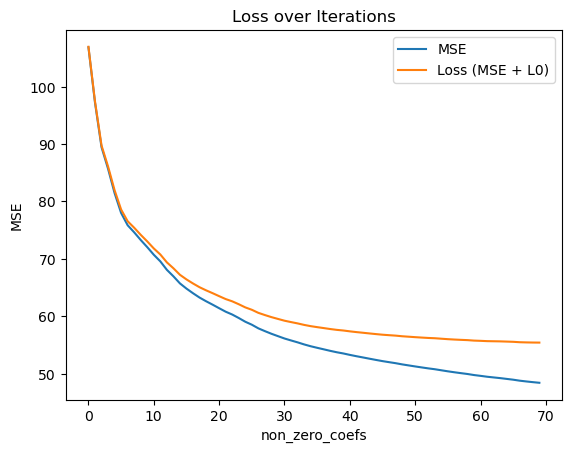

In [799]:
plt.plot(range(0,len(mses)), mses, label='MSE')
plt.plot(range(0,len(objs)),objs,  label='Loss (MSE + L0)')

plt.xlabel('non_zero_coefs')
plt.ylabel('MSE')
plt.title('Loss over Iterations')
plt.legend()


In [800]:
selected_features01, beta_final01, mses01, objs01 = l0_linear_regression(X_n, y_n, lambda_penalty=0.01, max_features=300)
selected_features25, beta_final25, mses25, objs25 = l0_linear_regression(X_n, y_n, lambda_penalty=0.25, max_features=300)
selected_features5, beta_final5, mses5, objs5 = l0_linear_regression(X_n, y_n, lambda_penalty=0.5, max_features=300)

No. featueres:  0
No. featueres:  1
No. featueres:  2
No. featueres:  3
No. featueres:  4
No. featueres:  5
No. featueres:  6
No. featueres:  7
No. featueres:  8
No. featueres:  9
No. featueres:  10
No. featueres:  11
No. featueres:  12
No. featueres:  13
No. featueres:  14
No. featueres:  15
No. featueres:  16
No. featueres:  17
No. featueres:  18
No. featueres:  19
No. featueres:  20
No. featueres:  21
No. featueres:  22
No. featueres:  23
No. featueres:  24
No. featueres:  25
No. featueres:  26
No. featueres:  27
No. featueres:  28
No. featueres:  29
No. featueres:  30
No. featueres:  31
No. featueres:  32
No. featueres:  33
No. featueres:  34
No. featueres:  35
No. featueres:  36
No. featueres:  37
No. featueres:  38
No. featueres:  39
No. featueres:  40
No. featueres:  41
No. featueres:  42
No. featueres:  43
No. featueres:  44
No. featueres:  45
No. featueres:  46
No. featueres:  47
No. featueres:  48
No. featueres:  49
No. featueres:  50
No. featueres:  51
No. featueres:  52
No.

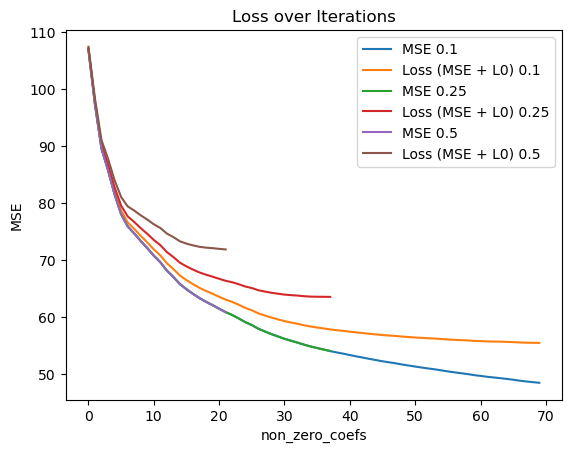

In [803]:
plt.plot(range(0,len(mses)), mses, label='MSE 0.1')
plt.plot(range(0,len(objs)),objs,  label='Loss (MSE + L0) 0.1')
#plt.plot(range(0,len(mses01)), mses01, label='MSE 0.01')
#plt.plot(range(0,len(objs01)),objs01,  label='Loss (MSE + L0) 0.01')
plt.plot(range(0,len(mses25)), mses25, label='MSE 0.25')
plt.plot(range(0,len(objs25)),objs25,  label='Loss (MSE + L0) 0.25')
plt.plot(range(0,len(mses5)), mses5, label='MSE 0.5')
plt.plot(range(0,len(objs5)),objs5,  label='Loss (MSE + L0) 0.5')

plt.xlabel('non_zero_coefs')
plt.ylabel('MSE')
plt.title('Loss over Iterations')
plt.legend()
